In [1]:
import os

import numpy as np
import pandas as pd
pd.options.display.max_colwidth = 200
import polars as pl

import seaborn as sns
import matplotlib.pyplot as plt

from clickhouse_driver import Client

client = Client('localhost', database="thesisproxyoccupancytimeoutdb")

In [2]:
%%time 

exp_data_sql = """
SELECT
	ex.*
FROM
	experiment ex
"""
exp_df = client.query_dataframe(exp_data_sql)

exp_df["request_timeout"] = exp_df["request_timeout"].astype(int)

print(len(exp_df.exp_id.unique().tolist()))
print("\n".join(exp_df.exp_id.unique().tolist()))
print()
exp_df

10
thesis_group_proxy_occ_timeout_8clients_withattacker_8000MBheap_50proxyconns_15sec_pxyto_coap_https__140sec_proxy__30sec_attacker__120sec_client
thesis_group_proxy_occ_timeout_8clients_withattacker_8000MBheap_50proxyconns_15sec_pxyto_dtls_https__140sec_proxy__30sec_attacker__120sec_client
thesis_group_proxy_occ_timeout_8clients_withattacker_8000MBheap_50proxyconns_30sec_pxyto_coap_https__140sec_proxy__30sec_attacker__120sec_client
thesis_group_proxy_occ_timeout_8clients_withattacker_8000MBheap_50proxyconns_30sec_pxyto_dtls_https__140sec_proxy__30sec_attacker__120sec_client
thesis_group_proxy_occ_timeout_8clients_withattacker_8000MBheap_50proxyconns_45sec_pxyto_coap_https__140sec_proxy__30sec_attacker__120sec_client
thesis_group_proxy_occ_timeout_8clients_withattacker_8000MBheap_50proxyconns_45sec_pxyto_dtls_https__140sec_proxy__30sec_attacker__120sec_client
thesis_group_proxy_occ_timeout_8clients_withattacker_8000MBheap_50proxyconns_5sec_pxyto_coap_https__140sec_proxy__30sec_attacke

,exp_id,attacker_rate,server_connections,max_keep_alive_requests,num_clients,num_trials,origin_server_duration,attacker_duration,receiver_duration,proxy_duration,...,topology_name,num_proxy_connections,request_timeout,max_retries,keep_alive_duration,request_retry_interval,reuse_connections,run_proxy_with_dtls,run_proxy_with_https,run_attacker
0,thesis_group_proxy_occ_timeout_8clients_withattacker_8000MBheap_50proxyconns_15sec_pxyto_coap_https__140sec_proxy__30sec_attacker__120sec_client,100mbps,256,0,8,5,140,30,140,140,...,thesis_cloud_proxy_and_internet_attacker,50,15,2,5,1,True,False,True,True
1,thesis_group_proxy_occ_timeout_8clients_withattacker_8000MBheap_50proxyconns_15sec_pxyto_dtls_https__140sec_proxy__30sec_attacker__120sec_client,100mbps,256,0,8,5,140,30,140,140,...,thesis_cloud_proxy_and_internet_attacker,50,15,2,5,1,True,True,True,True
2,thesis_group_proxy_occ_timeout_8clients_withattacker_8000MBheap_50proxyconns_30sec_pxyto_coap_https__140sec_proxy__30sec_attacker__120sec_client,100mbps,256,0,8,5,140,30,140,140,...,thesis_cloud_proxy_and_internet_attacker,50,30,2,5,1,True,False,True,True
3,thesis_group_proxy_occ_timeout_8clients_withattacker_8000MBheap_50proxyconns_30sec_pxyto_dtls_https__140sec_proxy__30sec_attacker__120sec_client,100mbps,256,0,8,5,140,30,140,140,...,thesis_cloud_proxy_and_internet_attacker,50,30,2,5,1,True,True,True,True
4,thesis_group_proxy_occ_timeout_8clients_withattacker_8000MBheap_50proxyconns_45sec_pxyto_coap_https__140sec_proxy__30sec_attacker__120sec_client,100mbps,256,0,8,5,140,30,140,140,...,thesis_cloud_proxy_and_internet_attacker,50,45,2,5,1,True,False,True,True
5,thesis_group_proxy_occ_timeout_8clients_withattacker_8000MBheap_50proxyconns_45sec_pxyto_dtls_https__140sec_proxy__30sec_attacker__120sec_client,100mbps,256,0,8,5,140,30,140,140,...,thesis_cloud_proxy_and_internet_attacker,50,45,2,5,1,True,True,True,True
6,thesis_group_proxy_occ_timeout_8clients_withattacker_8000MBheap_50proxyconns_5sec_pxyto_coap_https__140sec_proxy__30sec_attacker__120sec_client,100mbps,256,0,8,5,140,30,140,140,...,thesis_cloud_proxy_and_internet_attacker,50,5,2,5,1,True,False,True,True
7,thesis_group_proxy_occ_timeout_8clients_withattacker_8000MBheap_50proxyconns_5sec_pxyto_dtls_https__140sec_proxy__30sec_attacker__120sec_client,100mbps,256,0,8,5,140,30,140,140,...,thesis_cloud_proxy_and_internet_attacker,50,5,2,5,1,True,True,True,True
8,thesis_group_proxy_occ_timeout_8clients_withattacker_8000MBheap_50proxyconns_60sec_pxyto_coap_https__140sec_proxy__30sec_attacker__120sec_client,100mbps,256,0,8,5,140,30,140,140,...,thesis_cloud_proxy_and_internet_attacker,50,60,2,5,1,True,False,True,True
9,thesis_group_proxy_occ_timeout_8clients_withattacker_8000MBheap_50proxyconns_60sec_pxyto_dtls_https__140sec_proxy__30sec_attacker__120sec_client,100mbps,256,0,8,5,140,30,140,140,...,thesis_cloud_proxy_and_internet_attacker,50,60,2,5,1,True,True,True,True


In [3]:
%%time 

fetch_metadata_sql = """
SELECT
	n.node_name,
	dn.dnid,
	dn.node_id,
  dn.exp_id
FROM 
	deployed_node dn
	JOIN node n ON n.node_id = dn.node_id
"""

metadata_df = client.query_dataframe(fetch_metadata_sql)

dnid_map_node_name = dict()
dnid_map_exp_id = dict()
node_id_map_node_name = dict()

for record in metadata_df.to_dict(orient="records"):
  dnid = record["dnid"]
  node_id = record["node_id"]
  node_name = record["node_name"]
  exp_id = record["exp_id"]
  
  assert dnid not in dnid_map_node_name
  dnid_map_node_name[dnid] = node_name
  dnid_map_exp_id[dnid] = exp_id
  
  if node_id in node_id_map_node_name:
    assert node_id_map_node_name[node_id] == node_name
  else:
    node_id_map_node_name[node_id] = node_name
  
client_dnids = set(dnid for dnid, node_name in dnid_map_node_name.items() if node_name.startswith("client"))
attacker_dnids = set(dnid for dnid, node_name in dnid_map_node_name.items() if node_name.startswith("attacker"))

client_node_ids = set(node_id for node_id, node_name in node_id_map_node_name.items() if node_name.startswith("client"))

print(f"{client_dnids=}")
print(f"{attacker_dnids=}")
print(f"{client_node_ids=}")

client_dnids={2, 3, 4, 5, 6, 7, 8, 9, 14, 15, 16, 17, 18, 19, 20, 21, 26, 27, 28, 29, 30, 31, 32, 33, 38, 39, 40, 41, 42, 43, 44, 45, 50, 51, 52, 53, 54, 55, 56, 57, 62, 63, 64, 65, 66, 67, 68, 69, 74, 75, 76, 77, 78, 79, 80, 81, 86, 87, 88, 89, 90, 91, 92, 93, 98, 99, 100, 101, 102, 103, 104, 105, 110, 111, 112, 113, 114, 115, 116, 117}
attacker_dnids={1, 97, 37, 73, 13, 109, 49, 85, 25, 61}
client_node_ids={2, 3, 4, 5, 6, 7, 8, 9}
CPU times: user 8.38 ms, sys: 2.12 ms, total: 10.5 ms
Wall time: 74.7 ms


In [4]:
client_messages_sql = f"""
WITH client_sends AS (
  SELECT
    dn.exp_id AS exp_id,
    e.observe_timestamp AS observe_timestamp,
    e.trial AS trial,
    e.observer_id AS observer_id,
    e.message_marker AS message_marker,
    cm.coap_retransmitted AS coap_retransmitted
  FROM
    event e
    JOIN message m ON m.message_id = e.message_id
    JOIN coap_message cm ON cm.cmci = m.coap_message
    JOIN deployed_node dn ON dn.dnid = e.observer_id
  WHERE
    e.observer_id IN ({','.join(map(str, client_dnids))})   -- client dnids
    AND m.src_id IN ({','.join(map(str, client_node_ids))}) -- clients are senders (node ID)
), 

client_recvs AS (
  SELECT
    e.observe_timestamp AS observe_timestamp,
    e.trial AS trial,
    e.observer_id AS observer_id,
    e.message_marker AS message_marker,
    cm.coap_code AS response_code
  FROM
    event e
    JOIN message m ON m.message_id = e.message_id
    JOIN coap_message cm ON cm.cmci = m.coap_message
  WHERE
    e.observer_id IN ({','.join(map(str, client_dnids))})   -- client dnids
    AND m.dst_id IN ({','.join(map(str, client_node_ids))}) -- clients are receivers (node ID)
)

SELECT
  client_sends.exp_id AS exp_id,
  client_sends.trial AS trial,
  client_sends.observer_id AS observer_id,
  client_sends.message_marker AS message_marker,
  groupArray(client_recvs.response_code)[1] AS response_code,
  MIN(client_sends.observe_timestamp) AS send_time_sec,
  MIN(client_recvs.observe_timestamp) AS recv_time_sec,
  MIN(client_sends.observe_timestamp) AS first_send_time_sec,
  MAX(client_sends.observe_timestamp) AS last_send_time_sec,
  MIN(client_recvs.observe_timestamp) AS first_recv_time_sec,
  MAX(client_recvs.observe_timestamp) AS last_recv_time_sec,
  1e3 * (MIN(client_recvs.observe_timestamp) - MIN(client_sends.observe_timestamp)) AS rtt_ms_first_transmission,
  1e3 * (MIN(client_recvs.observe_timestamp) - MAX(client_sends.observe_timestamp)) AS rtt_ms_last_transmission,
  COUNT(client_sends.observe_timestamp) AS num_send_observations,
  COUNT(client_recvs.observe_timestamp) AS num_recv_observations,
  SUM(CASE WHEN client_sends.coap_retransmitted = true THEN 1 ELSE 0 END) AS num_retransmissions
FROM client_sends
  LEFT JOIN client_recvs USING (trial, observer_id, message_marker)
GROUP BY 
  exp_id, trial, observer_id, message_marker
ORDER BY
  exp_id, trial, observer_id, message_marker
"""

message_rtt_df = client.query_dataframe(client_messages_sql)
message_rtt_df.observer_id.replace(dnid_map_node_name, inplace=True)

message_rtt_df["successful_message"] = False
message_rtt_df.loc[(message_rtt_df["response_code"] == "content"), "successful_message"] = True

print(message_rtt_df["response_code"].unique())

message_rtt_df = message_rtt_df.merge(exp_df, on="exp_id", how="left")

# Due to left join, we need to eliminate lines that
# have negative RTT, so we NaN them.
message_rtt_df.loc[
  (message_rtt_df["rtt_ms_first_transmission"] < 0)
  | (message_rtt_df["rtt_ms_last_transmission"] < 0)
  ,
  ["rtt_ms_first_transmission", "rtt_ms_last_transmission"]
] = np.nan

message_rtt_df

['content' 'bad_gateway' '']


,exp_id,trial,observer_id,message_marker,response_code,send_time_sec,recv_time_sec,first_send_time_sec,last_send_time_sec,first_recv_time_sec,...,topology_name,num_proxy_connections,request_timeout,max_retries,keep_alive_duration,request_retry_interval,reuse_connections,run_proxy_with_dtls,run_proxy_with_https,run_attacker
0,thesis_group_proxy_occ_timeout_8clients_withattacker_8000MBheap_50proxyconns_15sec_pxyto_coap_https__140sec_proxy__30sec_attacker__120sec_client,1,client1,1,content,0.000000,0.351116,0.000000,0.000000,0.351116,...,thesis_cloud_proxy_and_internet_attacker,50,15,2,5,1,True,False,True,True
1,thesis_group_proxy_occ_timeout_8clients_withattacker_8000MBheap_50proxyconns_15sec_pxyto_coap_https__140sec_proxy__30sec_attacker__120sec_client,1,client1,2,content,0.368913,0.428905,0.368913,0.368913,0.428905,...,thesis_cloud_proxy_and_internet_attacker,50,15,2,5,1,True,False,True,True
2,thesis_group_proxy_occ_timeout_8clients_withattacker_8000MBheap_50proxyconns_15sec_pxyto_coap_https__140sec_proxy__30sec_attacker__120sec_client,1,client1,3,content,0.431380,0.489696,0.431380,0.431380,0.489696,...,thesis_cloud_proxy_and_internet_attacker,50,15,2,5,1,True,False,True,True
3,thesis_group_proxy_occ_timeout_8clients_withattacker_8000MBheap_50proxyconns_15sec_pxyto_coap_https__140sec_proxy__30sec_attacker__120sec_client,1,client1,4,content,0.492094,0.549362,0.492094,0.492094,0.549362,...,thesis_cloud_proxy_and_internet_attacker,50,15,2,5,1,True,False,True,True
4,thesis_group_proxy_occ_timeout_8clients_withattacker_8000MBheap_50proxyconns_15sec_pxyto_coap_https__140sec_proxy__30sec_attacker__120sec_client,1,client1,5,content,0.551819,0.608503,0.551819,0.551819,0.608503,...,thesis_cloud_proxy_and_internet_attacker,50,15,2,5,1,True,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
440827,thesis_group_proxy_occ_timeout_8clients_withattacker_8000MBheap_50proxyconns_60sec_pxyto_dtls_https__140sec_proxy__30sec_attacker__120sec_client,5,client8,4954,content,37.290514,37.490319,37.290514,37.290514,37.490319,...,thesis_cloud_proxy_and_internet_attacker,50,60,2,5,1,True,True,True,True
440828,thesis_group_proxy_occ_timeout_8clients_withattacker_8000MBheap_50proxyconns_60sec_pxyto_dtls_https__140sec_proxy__30sec_attacker__120sec_client,5,client8,9438,content,37.491369,38.312782,37.491369,37.491369,38.312782,...,thesis_cloud_proxy_and_internet_attacker,50,60,2,5,1,True,True,True,True
440829,thesis_group_proxy_occ_timeout_8clients_withattacker_8000MBheap_50proxyconns_60sec_pxyto_dtls_https__140sec_proxy__30sec_attacker__120sec_client,5,client8,29145,content,38.313905,41.091341,38.313905,40.531516,41.091341,...,thesis_cloud_proxy_and_internet_attacker,50,60,2,5,1,True,True,True,True
440830,thesis_group_proxy_occ_timeout_8clients_withattacker_8000MBheap_50proxyconns_60sec_pxyto_dtls_https__140sec_proxy__30sec_attacker__120sec_client,5,client8,95827,content,41.092547,83.919629,41.092547,76.149647,83.919629,...,thesis_cloud_proxy_and_internet_attacker,50,60,2,5,1,True,True,True,True


In [5]:
%%time

client_sends_sql = f"""
WITH client_sends AS (
  SELECT
    dn.exp_id AS exp_id,
    e.observe_timestamp AS observe_timestamp,
    e.trial AS trial,
    e.observer_id AS observer_id,
    e.message_marker AS message_marker,
    cm.coap_retransmitted AS coap_retransmitted
  FROM
    event e
    JOIN message m ON m.message_id = e.message_id
    JOIN coap_message cm ON cm.cmci = m.coap_message
    JOIN deployed_node dn ON dn.dnid = e.observer_id
  WHERE
    e.observer_id IN ({','.join(map(str, client_dnids))})   -- client dnids
    AND m.src_id IN ({','.join(map(str, client_node_ids))}) -- clients are senders (node ID)
)

SELECT * FROM client_sends
ORDER BY exp_id, trial, observer_id, message_marker
"""

client_sends_df = client.query_dataframe(client_sends_sql)
client_sends_df.observer_id.replace(dnid_map_node_name, inplace=True)

client_sends_df

CPU times: user 988 ms, sys: 309 ms, total: 1.3 s
Wall time: 3.53 s


,exp_id,observe_timestamp,trial,observer_id,message_marker,coap_retransmitted
0,thesis_group_proxy_occ_timeout_8clients_withattacker_8000MBheap_50proxyconns_15sec_pxyto_coap_https__140sec_proxy__30sec_attacker__120sec_client,0.000000,1,client1,1,False
1,thesis_group_proxy_occ_timeout_8clients_withattacker_8000MBheap_50proxyconns_15sec_pxyto_coap_https__140sec_proxy__30sec_attacker__120sec_client,0.368913,1,client1,2,False
2,thesis_group_proxy_occ_timeout_8clients_withattacker_8000MBheap_50proxyconns_15sec_pxyto_coap_https__140sec_proxy__30sec_attacker__120sec_client,0.431380,1,client1,3,False
3,thesis_group_proxy_occ_timeout_8clients_withattacker_8000MBheap_50proxyconns_15sec_pxyto_coap_https__140sec_proxy__30sec_attacker__120sec_client,0.492094,1,client1,4,False
4,thesis_group_proxy_occ_timeout_8clients_withattacker_8000MBheap_50proxyconns_15sec_pxyto_coap_https__140sec_proxy__30sec_attacker__120sec_client,0.551819,1,client1,5,False
...,...,...,...,...,...,...
443783,thesis_group_proxy_occ_timeout_8clients_withattacker_8000MBheap_50proxyconns_60sec_pxyto_dtls_https__140sec_proxy__30sec_attacker__120sec_client,120.448260,5,client8,724947,True
443784,thesis_group_proxy_occ_timeout_8clients_withattacker_8000MBheap_50proxyconns_60sec_pxyto_dtls_https__140sec_proxy__30sec_attacker__120sec_client,100.967638,5,client8,724947,True
443785,thesis_group_proxy_occ_timeout_8clients_withattacker_8000MBheap_50proxyconns_60sec_pxyto_dtls_https__140sec_proxy__30sec_attacker__120sec_client,91.227063,5,client8,724947,True
443786,thesis_group_proxy_occ_timeout_8clients_withattacker_8000MBheap_50proxyconns_60sec_pxyto_dtls_https__140sec_proxy__30sec_attacker__120sec_client,83.921051,5,client8,724947,False


In [6]:
%%time

client_recvs_sql = f"""
WITH client_recvs AS (
  SELECT
    dn.exp_id AS exp_id,
    e.observe_timestamp AS observe_timestamp,
    e.trial AS trial,
    e.observer_id AS observer_id,
    e.message_marker AS message_marker,
    cm.coap_code AS response_code
  FROM
    event e
    JOIN message m ON m.message_id = e.message_id
    JOIN coap_message cm ON cm.cmci = m.coap_message
    JOIN deployed_node dn ON dn.dnid = e.observer_id
  WHERE
    e.observer_id IN ({','.join(map(str, client_dnids))})   -- client dnids
    AND m.dst_id IN ({','.join(map(str, client_node_ids))}) -- clients are receivers (node ID)
)

SELECT * FROM client_recvs
ORDER BY exp_id, trial, observer_id, message_marker
"""

client_recvs_df = client.query_dataframe(client_recvs_sql)
client_recvs_df.observer_id.replace(dnid_map_node_name, inplace=True)

client_recvs_df["successful_message"] = False
client_recvs_df.loc[(client_recvs_df["response_code"] == "content"), "successful_message"] = True

print(client_recvs_df["response_code"].unique())

client_recvs_df

['content' 'bad_gateway']
CPU times: user 1.29 s, sys: 372 ms, total: 1.66 s
Wall time: 4.26 s


,exp_id,observe_timestamp,trial,observer_id,message_marker,response_code,successful_message
0,thesis_group_proxy_occ_timeout_8clients_withattacker_8000MBheap_50proxyconns_15sec_pxyto_coap_https__140sec_proxy__30sec_attacker__120sec_client,0.351116,1,client1,1,content,True
1,thesis_group_proxy_occ_timeout_8clients_withattacker_8000MBheap_50proxyconns_15sec_pxyto_coap_https__140sec_proxy__30sec_attacker__120sec_client,0.428905,1,client1,2,content,True
2,thesis_group_proxy_occ_timeout_8clients_withattacker_8000MBheap_50proxyconns_15sec_pxyto_coap_https__140sec_proxy__30sec_attacker__120sec_client,0.489696,1,client1,3,content,True
3,thesis_group_proxy_occ_timeout_8clients_withattacker_8000MBheap_50proxyconns_15sec_pxyto_coap_https__140sec_proxy__30sec_attacker__120sec_client,0.549362,1,client1,4,content,True
4,thesis_group_proxy_occ_timeout_8clients_withattacker_8000MBheap_50proxyconns_15sec_pxyto_coap_https__140sec_proxy__30sec_attacker__120sec_client,0.608503,1,client1,5,content,True
...,...,...,...,...,...,...,...
440436,thesis_group_proxy_occ_timeout_8clients_withattacker_8000MBheap_50proxyconns_60sec_pxyto_dtls_https__140sec_proxy__30sec_attacker__120sec_client,37.289497,5,client8,4946,content,True
440437,thesis_group_proxy_occ_timeout_8clients_withattacker_8000MBheap_50proxyconns_60sec_pxyto_dtls_https__140sec_proxy__30sec_attacker__120sec_client,37.490319,5,client8,4954,content,True
440438,thesis_group_proxy_occ_timeout_8clients_withattacker_8000MBheap_50proxyconns_60sec_pxyto_dtls_https__140sec_proxy__30sec_attacker__120sec_client,38.312782,5,client8,9438,content,True
440439,thesis_group_proxy_occ_timeout_8clients_withattacker_8000MBheap_50proxyconns_60sec_pxyto_dtls_https__140sec_proxy__30sec_attacker__120sec_client,41.091341,5,client8,29145,content,True


In [7]:
%%time

metric_usage_sql = f"""
SELECT
	dn.exp_id,
	nm.trial,
	nm.observer_id,
	nm.metric_type,
	AVG(nm.metric_value) AS avg_value,
	MIN(nm.metric_value) AS min_value,
	MAX(nm.metric_value) AS max_value
FROM
	node_metric nm
	JOIN deployed_node dn ON dn.dnid = nm.observer_id
GROUP BY
	dn.exp_id, nm.trial, nm.observer_id, nm.metric_type
ORDER BY
	dn.exp_id, nm.trial, nm.metric_type, nm.observer_id
"""

metric_df = client.query_dataframe(metric_usage_sql)

metric_df.observer_id.replace(dnid_map_node_name, inplace=True)

metric_df = metric_df.merge(exp_df, on="exp_id", how="left")

metric_df

CPU times: user 18 ms, sys: 3.14 ms, total: 21.1 ms
Wall time: 213 ms


,exp_id,trial,observer_id,metric_type,avg_value,min_value,max_value,attacker_rate,server_connections,max_keep_alive_requests,...,topology_name,num_proxy_connections,request_timeout,max_retries,keep_alive_duration,request_retry_interval,reuse_connections,run_proxy_with_dtls,run_proxy_with_https,run_attacker
0,thesis_group_proxy_occ_timeout_8clients_withattacker_8000MBheap_50proxyconns_15sec_pxyto_coap_https__140sec_proxy__30sec_attacker__120sec_client,1,originserver,cpu_utilization,6.491429,0.4,23.7,100mbps,256,0,...,thesis_cloud_proxy_and_internet_attacker,50,15,2,5,1,True,False,True,True
1,thesis_group_proxy_occ_timeout_8clients_withattacker_8000MBheap_50proxyconns_15sec_pxyto_coap_https__140sec_proxy__30sec_attacker__120sec_client,1,proxy,cpu_utilization,17.980714,0.5,84.2,100mbps,256,0,...,thesis_cloud_proxy_and_internet_attacker,50,15,2,5,1,True,False,True,True
2,thesis_group_proxy_occ_timeout_8clients_withattacker_8000MBheap_50proxyconns_15sec_pxyto_coap_https__140sec_proxy__30sec_attacker__120sec_client,1,originserver,memory_utilization,267.271523,242.0,298.0,100mbps,256,0,...,thesis_cloud_proxy_and_internet_attacker,50,15,2,5,1,True,False,True,True
3,thesis_group_proxy_occ_timeout_8clients_withattacker_8000MBheap_50proxyconns_15sec_pxyto_coap_https__140sec_proxy__30sec_attacker__120sec_client,1,proxy,memory_utilization,3619.836394,248.0,6077.0,100mbps,256,0,...,thesis_cloud_proxy_and_internet_attacker,50,15,2,5,1,True,False,True,True
4,thesis_group_proxy_occ_timeout_8clients_withattacker_8000MBheap_50proxyconns_15sec_pxyto_coap_https__140sec_proxy__30sec_attacker__120sec_client,2,originserver,cpu_utilization,6.098571,0.5,22.1,100mbps,256,0,...,thesis_cloud_proxy_and_internet_attacker,50,15,2,5,1,True,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,thesis_group_proxy_occ_timeout_8clients_withattacker_8000MBheap_50proxyconns_60sec_pxyto_dtls_https__140sec_proxy__30sec_attacker__120sec_client,4,proxy,memory_utilization,3628.232441,252.0,6385.0,100mbps,256,0,...,thesis_cloud_proxy_and_internet_attacker,50,60,2,5,1,True,True,True,True
196,thesis_group_proxy_occ_timeout_8clients_withattacker_8000MBheap_50proxyconns_60sec_pxyto_dtls_https__140sec_proxy__30sec_attacker__120sec_client,5,originserver,cpu_utilization,13.940714,0.4,26.7,100mbps,256,0,...,thesis_cloud_proxy_and_internet_attacker,50,60,2,5,1,True,True,True,True
197,thesis_group_proxy_occ_timeout_8clients_withattacker_8000MBheap_50proxyconns_60sec_pxyto_dtls_https__140sec_proxy__30sec_attacker__120sec_client,5,proxy,cpu_utilization,24.487857,0.4,85.7,100mbps,256,0,...,thesis_cloud_proxy_and_internet_attacker,50,60,2,5,1,True,True,True,True
198,thesis_group_proxy_occ_timeout_8clients_withattacker_8000MBheap_50proxyconns_60sec_pxyto_dtls_https__140sec_proxy__30sec_attacker__120sec_client,5,originserver,memory_utilization,285.458472,256.0,335.0,100mbps,256,0,...,thesis_cloud_proxy_and_internet_attacker,50,60,2,5,1,True,True,True,True


In [8]:
%%time

client_rps_df = (
  message_rtt_df
  .groupby(by=["exp_id", "trial", "observer_id"])
  .aggregate(
    num_messages=("successful_message", "count"),
    num_successful_messages=("successful_message", "sum"),
    mean_rps=("successful_message", "sum"),
    max_num_retransmissions=("num_retransmissions", "max"),
    total_num_retransmissions=("num_retransmissions", "sum"),
    stddev_rtt_ms=("rtt_ms_first_transmission", "std"),
    min_rtt_ms=("rtt_ms_first_transmission", "min"),
    median_rtt_ms=("rtt_ms_first_transmission", "median"),
    mean_rtt_ms=("rtt_ms_first_transmission", "mean"),
    max_rtt_ms=("rtt_ms_first_transmission", "max"),
    rtt_ms_p0=("rtt_ms_first_transmission", lambda s : pd.Series.quantile(s, q=0.00)),
    rtt_ms_p25=("rtt_ms_first_transmission", lambda s : pd.Series.quantile(s, q=0.25)),
    rtt_ms_p50=("rtt_ms_first_transmission", lambda s : pd.Series.quantile(s, q=0.50)),
    rtt_ms_p75=("rtt_ms_first_transmission", lambda s : pd.Series.quantile(s, q=0.75)),
    rtt_ms_p90=("rtt_ms_first_transmission", lambda s : pd.Series.quantile(s, q=0.90)),
    rtt_ms_p99=("rtt_ms_first_transmission", lambda s : pd.Series.quantile(s, q=0.99)),
    rtt_ms_p100=("rtt_ms_first_transmission", lambda s : pd.Series.quantile(s, q=1.00)),
    first_active_time=("first_send_time_sec", "min"),
    last_active_time=("last_recv_time_sec", "max"),
  )
  .reset_index()
)
assert client_rps_df["min_rtt_ms"].eq(client_rps_df["rtt_ms_p0"]).all()
assert client_rps_df["median_rtt_ms"].eq(client_rps_df["rtt_ms_p50"]).all()
assert client_rps_df["max_rtt_ms"].eq(client_rps_df["rtt_ms_p100"]).all()

client_rps_df["num_failed_messages"] = client_rps_df["num_messages"] - client_rps_df["num_successful_messages"]
client_rps_df["average_rps"] = client_rps_df["num_successful_messages"] / (client_rps_df["last_active_time"] - client_rps_df["first_active_time"])

client_rps_df = client_rps_df.merge(exp_df, on="exp_id")
bool_col_replacement = {
  "run_proxy_with_dtls": {True: "dtls", False: "coap"},
  "run_proxy_with_https": {True: "https", False: "http"},
  "reuse_connections": {True: "reuse-connections", False: "no-connection-reuse"},
  "run_attacker": {True: "attacker", False: "no-attacker"},
}
client_rps_df.replace(bool_col_replacement, inplace=True)

client_rps_df["mean_rps"] /= client_rps_df["client_duration"]

client_rps_df[["exp_id", "trial", "observer_id", "mean_rps"]]

client_rps_df

CPU times: user 3.24 s, sys: 0 ns, total: 3.24 s
Wall time: 5.89 s


,exp_id,trial,observer_id,num_messages,num_successful_messages,mean_rps,max_num_retransmissions,total_num_retransmissions,stddev_rtt_ms,min_rtt_ms,...,topology_name,num_proxy_connections,request_timeout,max_retries,keep_alive_duration,request_retry_interval,reuse_connections,run_proxy_with_dtls,run_proxy_with_https,run_attacker
0,thesis_group_proxy_occ_timeout_8clients_withattacker_8000MBheap_50proxyconns_15sec_pxyto_coap_https__140sec_proxy__30sec_attacker__120sec_client,1,client1,1383,1381,11.508333,2,6,690.910393,51.512957,...,thesis_cloud_proxy_and_internet_attacker,50,15,2,5,1,reuse-connections,coap,https,attacker
1,thesis_group_proxy_occ_timeout_8clients_withattacker_8000MBheap_50proxyconns_15sec_pxyto_coap_https__140sec_proxy__30sec_attacker__120sec_client,1,client2,1392,1389,11.575000,2,7,644.054828,51.547050,...,thesis_cloud_proxy_and_internet_attacker,50,15,2,5,1,reuse-connections,coap,https,attacker
2,thesis_group_proxy_occ_timeout_8clients_withattacker_8000MBheap_50proxyconns_15sec_pxyto_coap_https__140sec_proxy__30sec_attacker__120sec_client,1,client3,1386,1383,11.525000,2,7,655.071446,51.543951,...,thesis_cloud_proxy_and_internet_attacker,50,15,2,5,1,reuse-connections,coap,https,attacker
3,thesis_group_proxy_occ_timeout_8clients_withattacker_8000MBheap_50proxyconns_15sec_pxyto_coap_https__140sec_proxy__30sec_attacker__120sec_client,1,client4,1393,1390,11.583333,2,7,653.720650,51.447868,...,thesis_cloud_proxy_and_internet_attacker,50,15,2,5,1,reuse-connections,coap,https,attacker
4,thesis_group_proxy_occ_timeout_8clients_withattacker_8000MBheap_50proxyconns_15sec_pxyto_coap_https__140sec_proxy__30sec_attacker__120sec_client,1,client5,1394,1392,11.600000,2,7,635.033207,51.489115,...,thesis_cloud_proxy_and_internet_attacker,50,15,2,5,1,reuse-connections,coap,https,attacker
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,thesis_group_proxy_occ_timeout_8clients_withattacker_8000MBheap_50proxyconns_60sec_pxyto_dtls_https__140sec_proxy__30sec_attacker__120sec_client,5,client4,635,634,5.283333,4,8,876.014921,52.173138,...,thesis_cloud_proxy_and_internet_attacker,50,60,2,5,1,reuse-connections,dtls,https,attacker
396,thesis_group_proxy_occ_timeout_8clients_withattacker_8000MBheap_50proxyconns_60sec_pxyto_dtls_https__140sec_proxy__30sec_attacker__120sec_client,5,client5,616,615,5.125000,4,7,1205.288286,52.356958,...,thesis_cloud_proxy_and_internet_attacker,50,60,2,5,1,reuse-connections,dtls,https,attacker
397,thesis_group_proxy_occ_timeout_8clients_withattacker_8000MBheap_50proxyconns_60sec_pxyto_dtls_https__140sec_proxy__30sec_attacker__120sec_client,5,client6,597,596,4.966667,3,8,1581.210999,52.325964,...,thesis_cloud_proxy_and_internet_attacker,50,60,2,5,1,reuse-connections,dtls,https,attacker
398,thesis_group_proxy_occ_timeout_8clients_withattacker_8000MBheap_50proxyconns_60sec_pxyto_dtls_https__140sec_proxy__30sec_attacker__120sec_client,5,client7,577,576,4.800000,4,7,1585.711538,52.164078,...,thesis_cloud_proxy_and_internet_attacker,50,60,2,5,1,reuse-connections,dtls,https,attacker


In [28]:
### Prepare for dev graphing.

import matplotlib as mpl
inline_rc = dict(mpl.rcParams)
mpl.rcParams.update(mpl.rcParamsDefault)

In [29]:
### At this point, we generate figures for the paper

plt.rcParams['figure.dpi']  = 300
plt.rcParams['savefig.dpi'] = 300

plt.rcParams['font.size']        = '18'
plt.rcParams['lines.linewidth']  = 3
plt.rcParams['lines.markersize'] = 9

client_rps_df.replace({
  "run_proxy_with_dtls": {
    "coap": "CoAP",
    "dtls": "CoAPS",
  }
}, inplace=True)

metric_df.replace({
  "run_proxy_with_dtls": {
    False: "CoAP",
    True : "CoAPS",
  }
}, inplace=True)

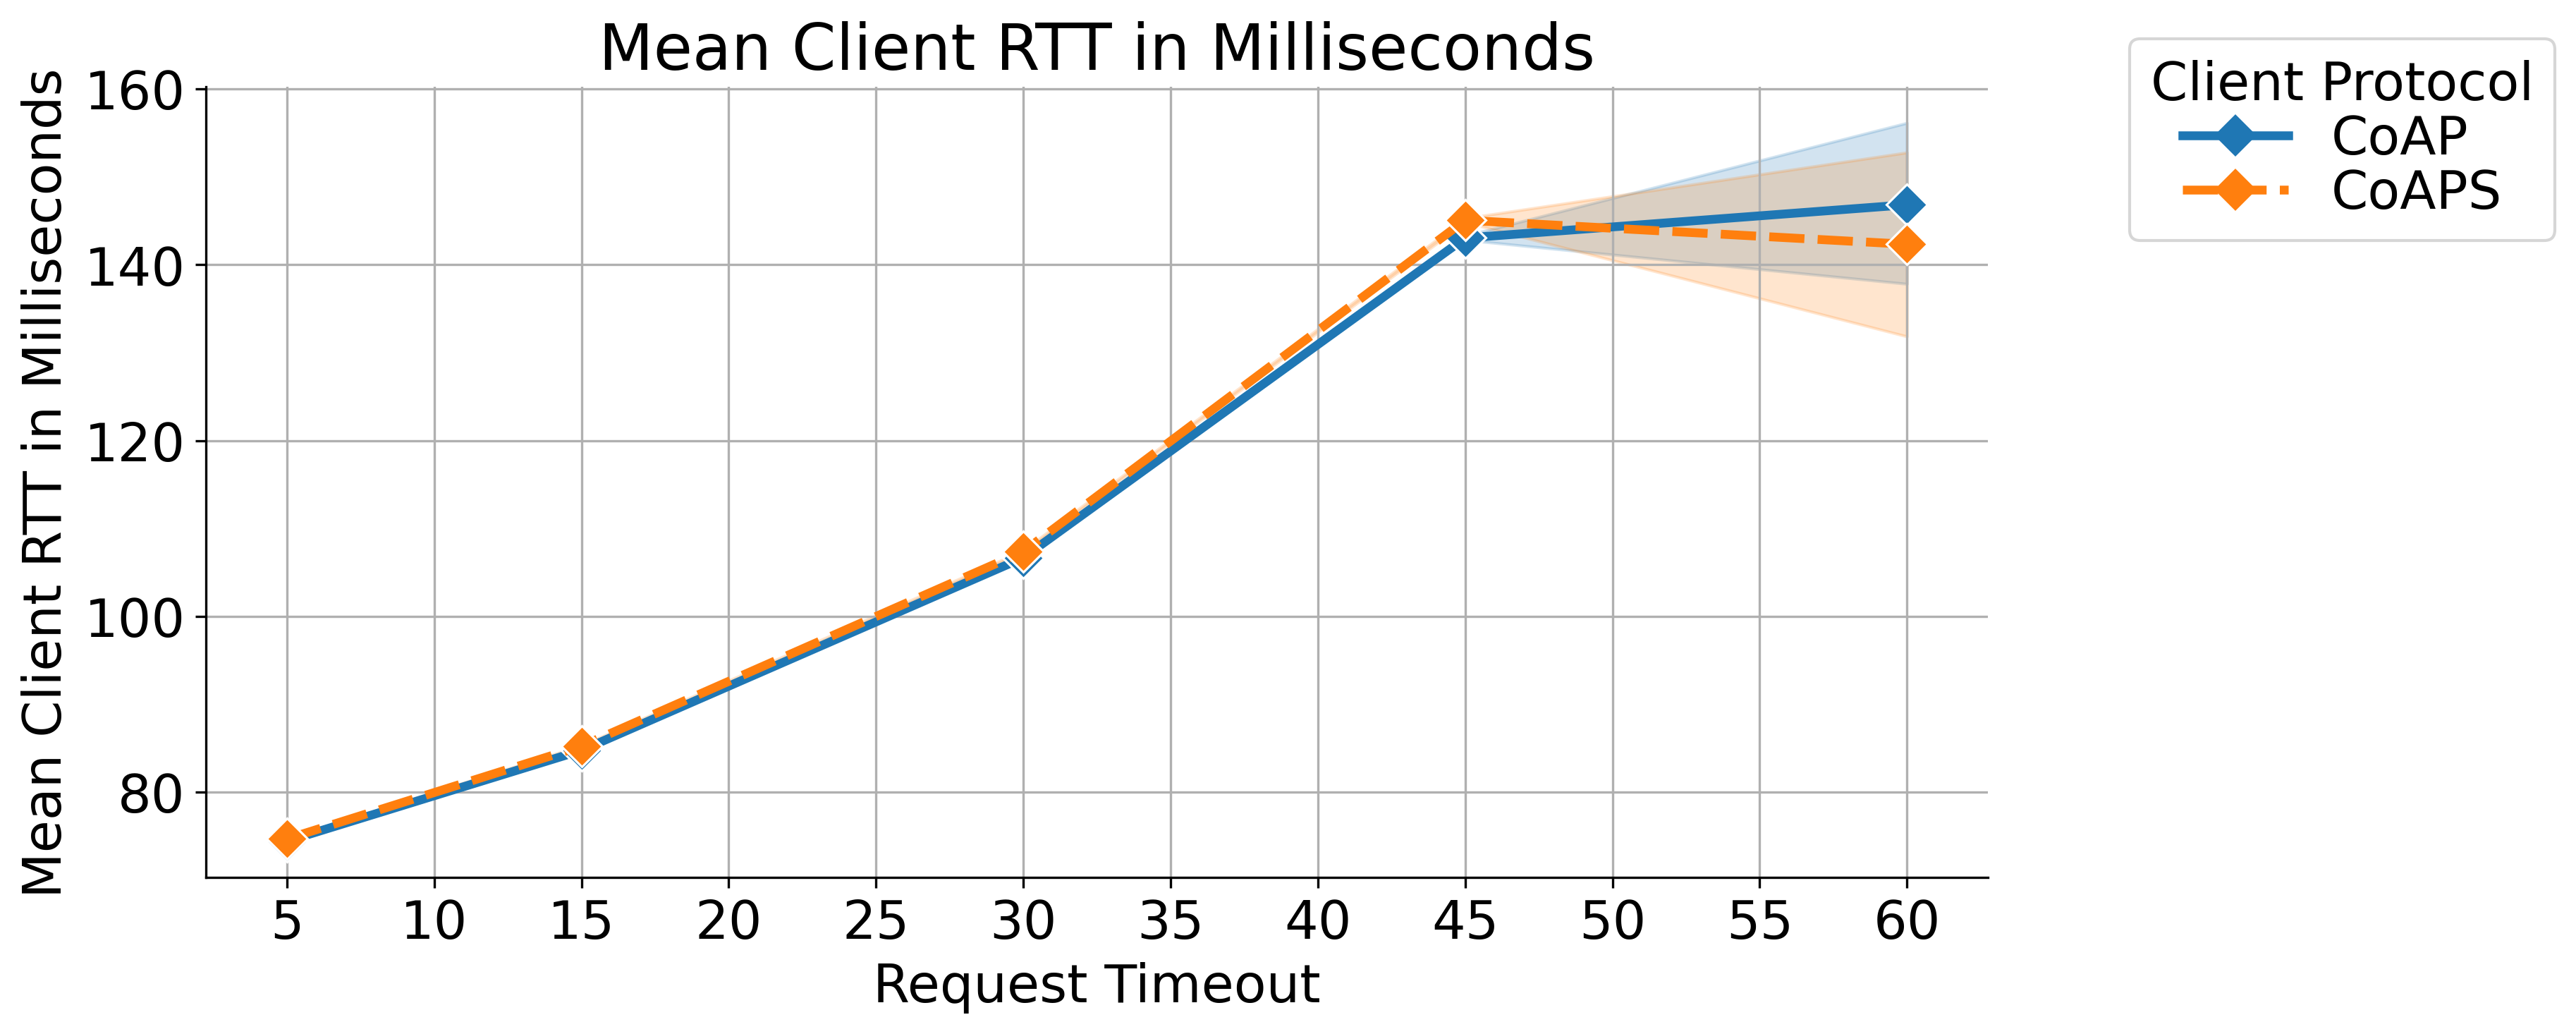

CPU times: user 1.39 s, sys: 177 ms, total: 1.57 s
Wall time: 1.25 s


In [32]:
%%time

### Plot effect of RTT as a result of increasing number of clients

df = client_rps_df

g = sns.relplot(
  data=df,
  kind="line",
  x="request_timeout",
  y="mean_rtt_ms",
  hue="run_proxy_with_dtls",
  style="run_proxy_with_dtls",
  markers=["D", "D"],
  markersize=10,
  aspect=2,
)

sns.move_legend(
  g, 
  "upper right", 
  title="Client Protocol", 
  frameon=True, 
  labelspacing=0.05,
  bbox_to_anchor=((1, 1)),
  markerfirst=True,
)

g.set_xlabels("Request Timeout")
g.set_ylabels("Mean Client RTT in Milliseconds")
g.set(xticks=np.arange(5,61,5), title="Mean Client RTT in Milliseconds")

plt.grid(True, axis="both")
plt.show()

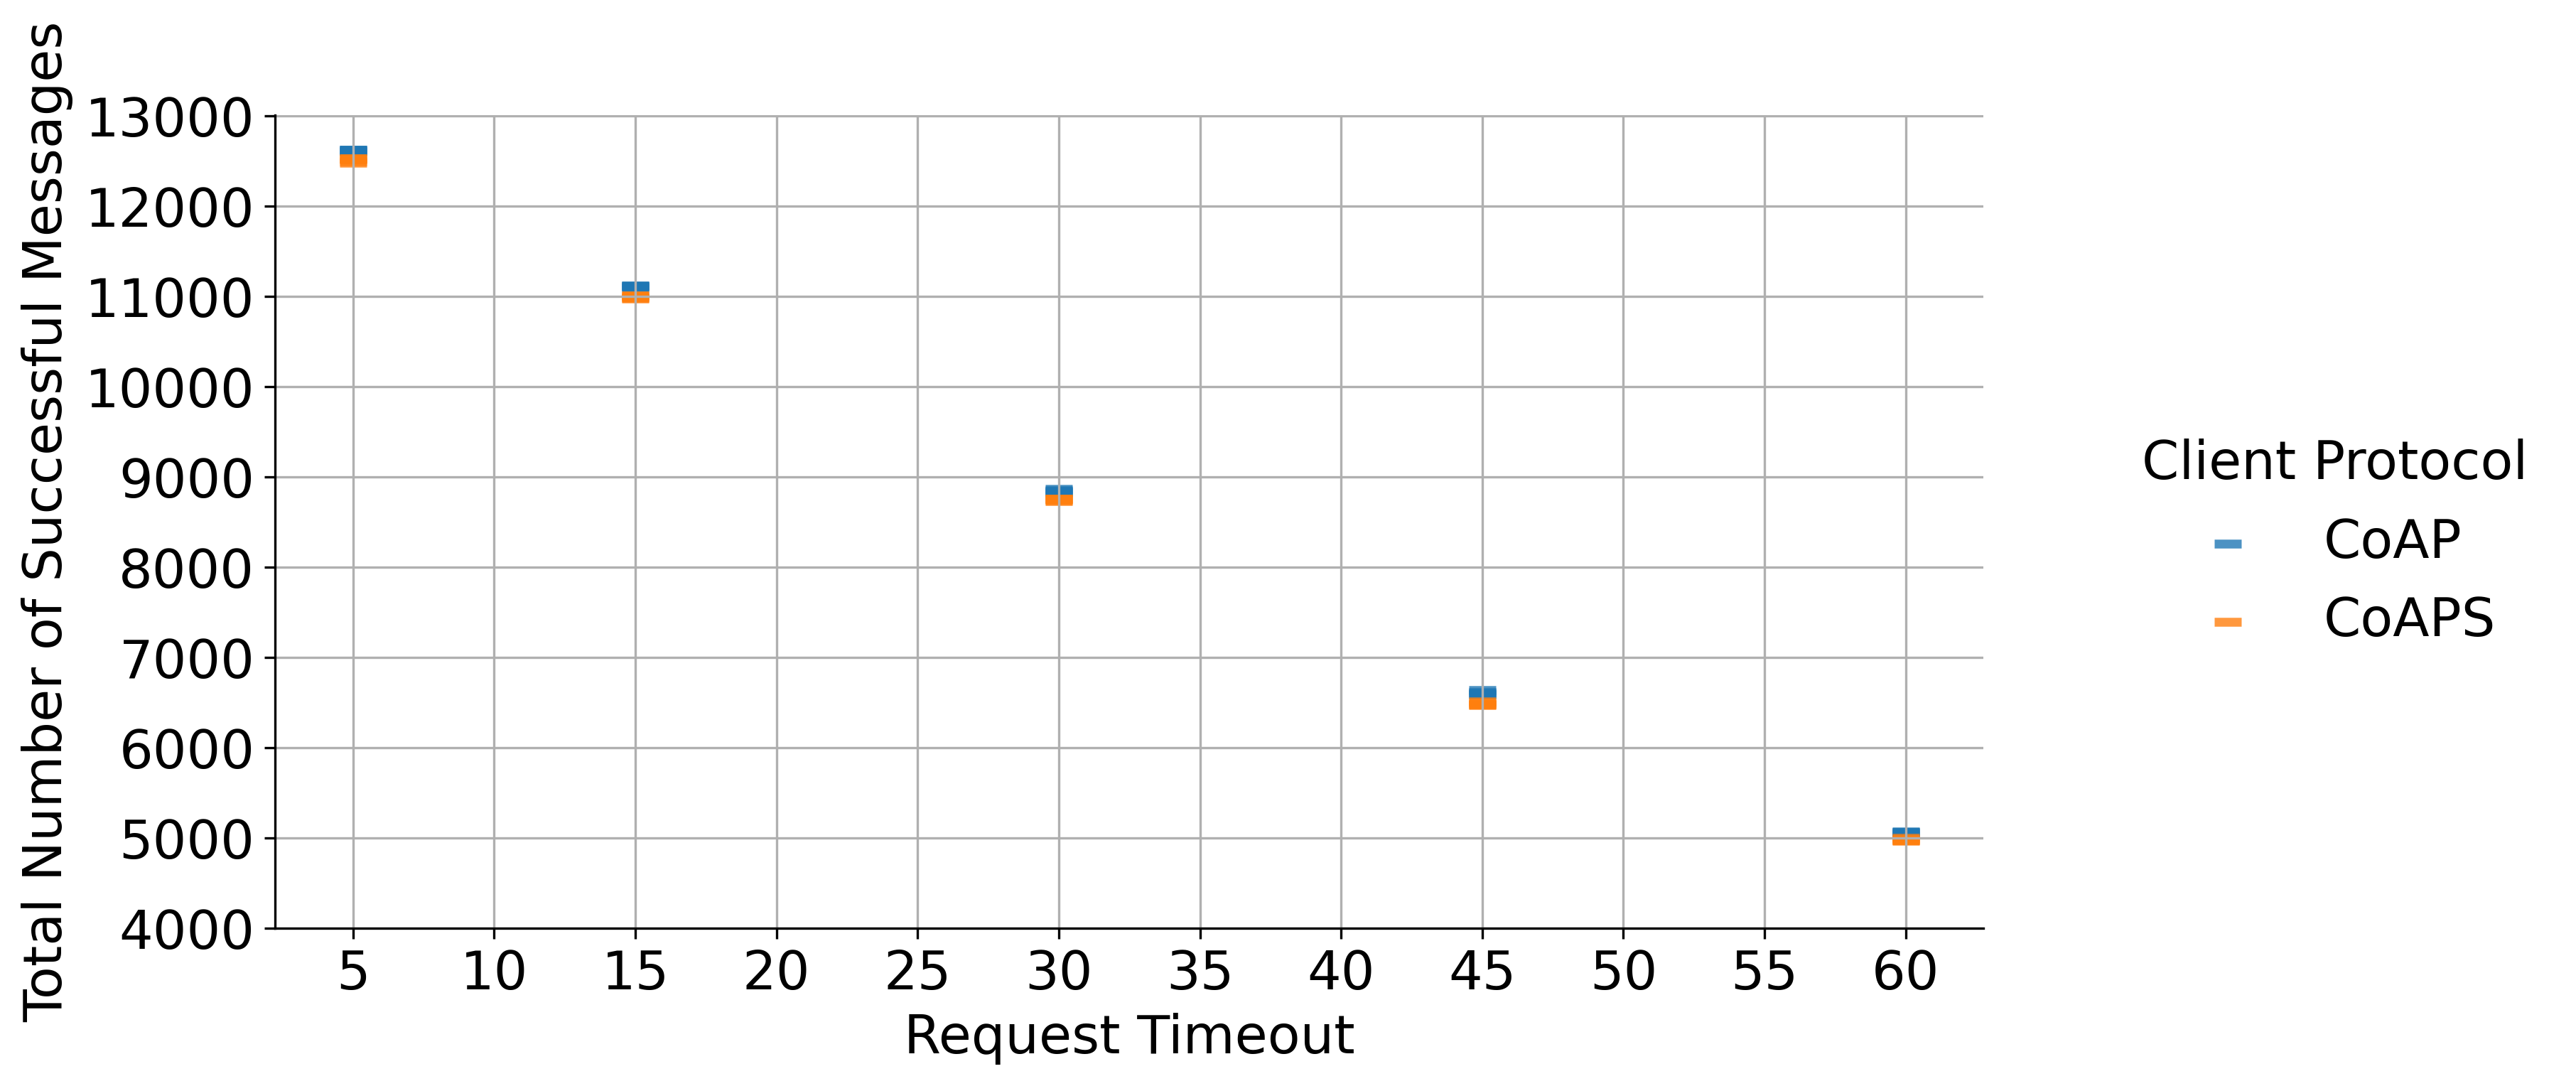

,exp_id,run_proxy_with_dtls,request_timeout,num_clients,trial,total_successful_messages,mean_active_time_sec,amortized_successful_rps
0,thesis_group_proxy_occ_timeout_8clients_withattacker_8000MBheap_50proxyconns_15sec_pxyto_coap_https__140sec_proxy__30sec_attacker__120sec_client,CoAP,15,8,1,11115,119.128680,11.662809
1,thesis_group_proxy_occ_timeout_8clients_withattacker_8000MBheap_50proxyconns_15sec_pxyto_coap_https__140sec_proxy__30sec_attacker__120sec_client,CoAP,15,8,2,11116,119.143688,11.662389
2,thesis_group_proxy_occ_timeout_8clients_withattacker_8000MBheap_50proxyconns_15sec_pxyto_coap_https__140sec_proxy__30sec_attacker__120sec_client,CoAP,15,8,3,11111,119.134720,11.658020
3,thesis_group_proxy_occ_timeout_8clients_withattacker_8000MBheap_50proxyconns_15sec_pxyto_coap_https__140sec_proxy__30sec_attacker__120sec_client,CoAP,15,8,4,11095,119.157403,11.639017
4,thesis_group_proxy_occ_timeout_8clients_withattacker_8000MBheap_50proxyconns_15sec_pxyto_coap_https__140sec_proxy__30sec_attacker__120sec_client,CoAP,15,8,5,11120,119.141741,11.666776
5,thesis_group_proxy_occ_timeout_8clients_withattacker_8000MBheap_50proxyconns_15sec_pxyto_dtls_https__140sec_proxy__30sec_attacker__120sec_client,CoAPS,15,8,1,11012,118.909586,11.576022
6,thesis_group_proxy_occ_timeout_8clients_withattacker_8000MBheap_50proxyconns_15sec_pxyto_dtls_https__140sec_proxy__30sec_attacker__120sec_client,CoAPS,15,8,2,10978,118.896652,11.541536
7,thesis_group_proxy_occ_timeout_8clients_withattacker_8000MBheap_50proxyconns_15sec_pxyto_dtls_https__140sec_proxy__30sec_attacker__120sec_client,CoAPS,15,8,3,11012,118.898978,11.577055
8,thesis_group_proxy_occ_timeout_8clients_withattacker_8000MBheap_50proxyconns_15sec_pxyto_dtls_https__140sec_proxy__30sec_attacker__120sec_client,CoAPS,15,8,4,10986,118.901387,11.549487
9,thesis_group_proxy_occ_timeout_8clients_withattacker_8000MBheap_50proxyconns_15sec_pxyto_dtls_https__140sec_proxy__30sec_attacker__120sec_client,CoAPS,15,8,5,10990,118.907395,11.553108


In [36]:
## Plot total number of successful messages.

client_rps_df["active_time_sec"] = client_rps_df["last_active_time"] - client_rps_df["first_active_time"]

df = (
  client_rps_df
  .groupby(by=["exp_id", "run_proxy_with_dtls", "request_timeout", "num_clients", "trial"])
  .agg(
    total_successful_messages=("num_successful_messages", "sum"),
    mean_active_time_sec=("active_time_sec", "mean"),
  )
  .reset_index()
)
df["amortized_successful_rps"] = df["total_successful_messages"] / df["mean_active_time_sec"] / df["num_clients"]

g = sns.lmplot(
  data=df,
  x="request_timeout",
  y="total_successful_messages",
  hue="run_proxy_with_dtls",
  aspect=2,
  markers=["_", "_"],
  scatter=True,
  fit_reg=False,
)

g.set_xlabels("Request Timeout")
g.set_ylabels("Total Number of Successful Messages")
g.legend.set_title("Client Protocol")
g.set(
  xticks=np.arange(5,61,5),
  yticks=np.arange(4000,13001,1000),
)

plt.grid(True, axis="both")
plt.show()

df

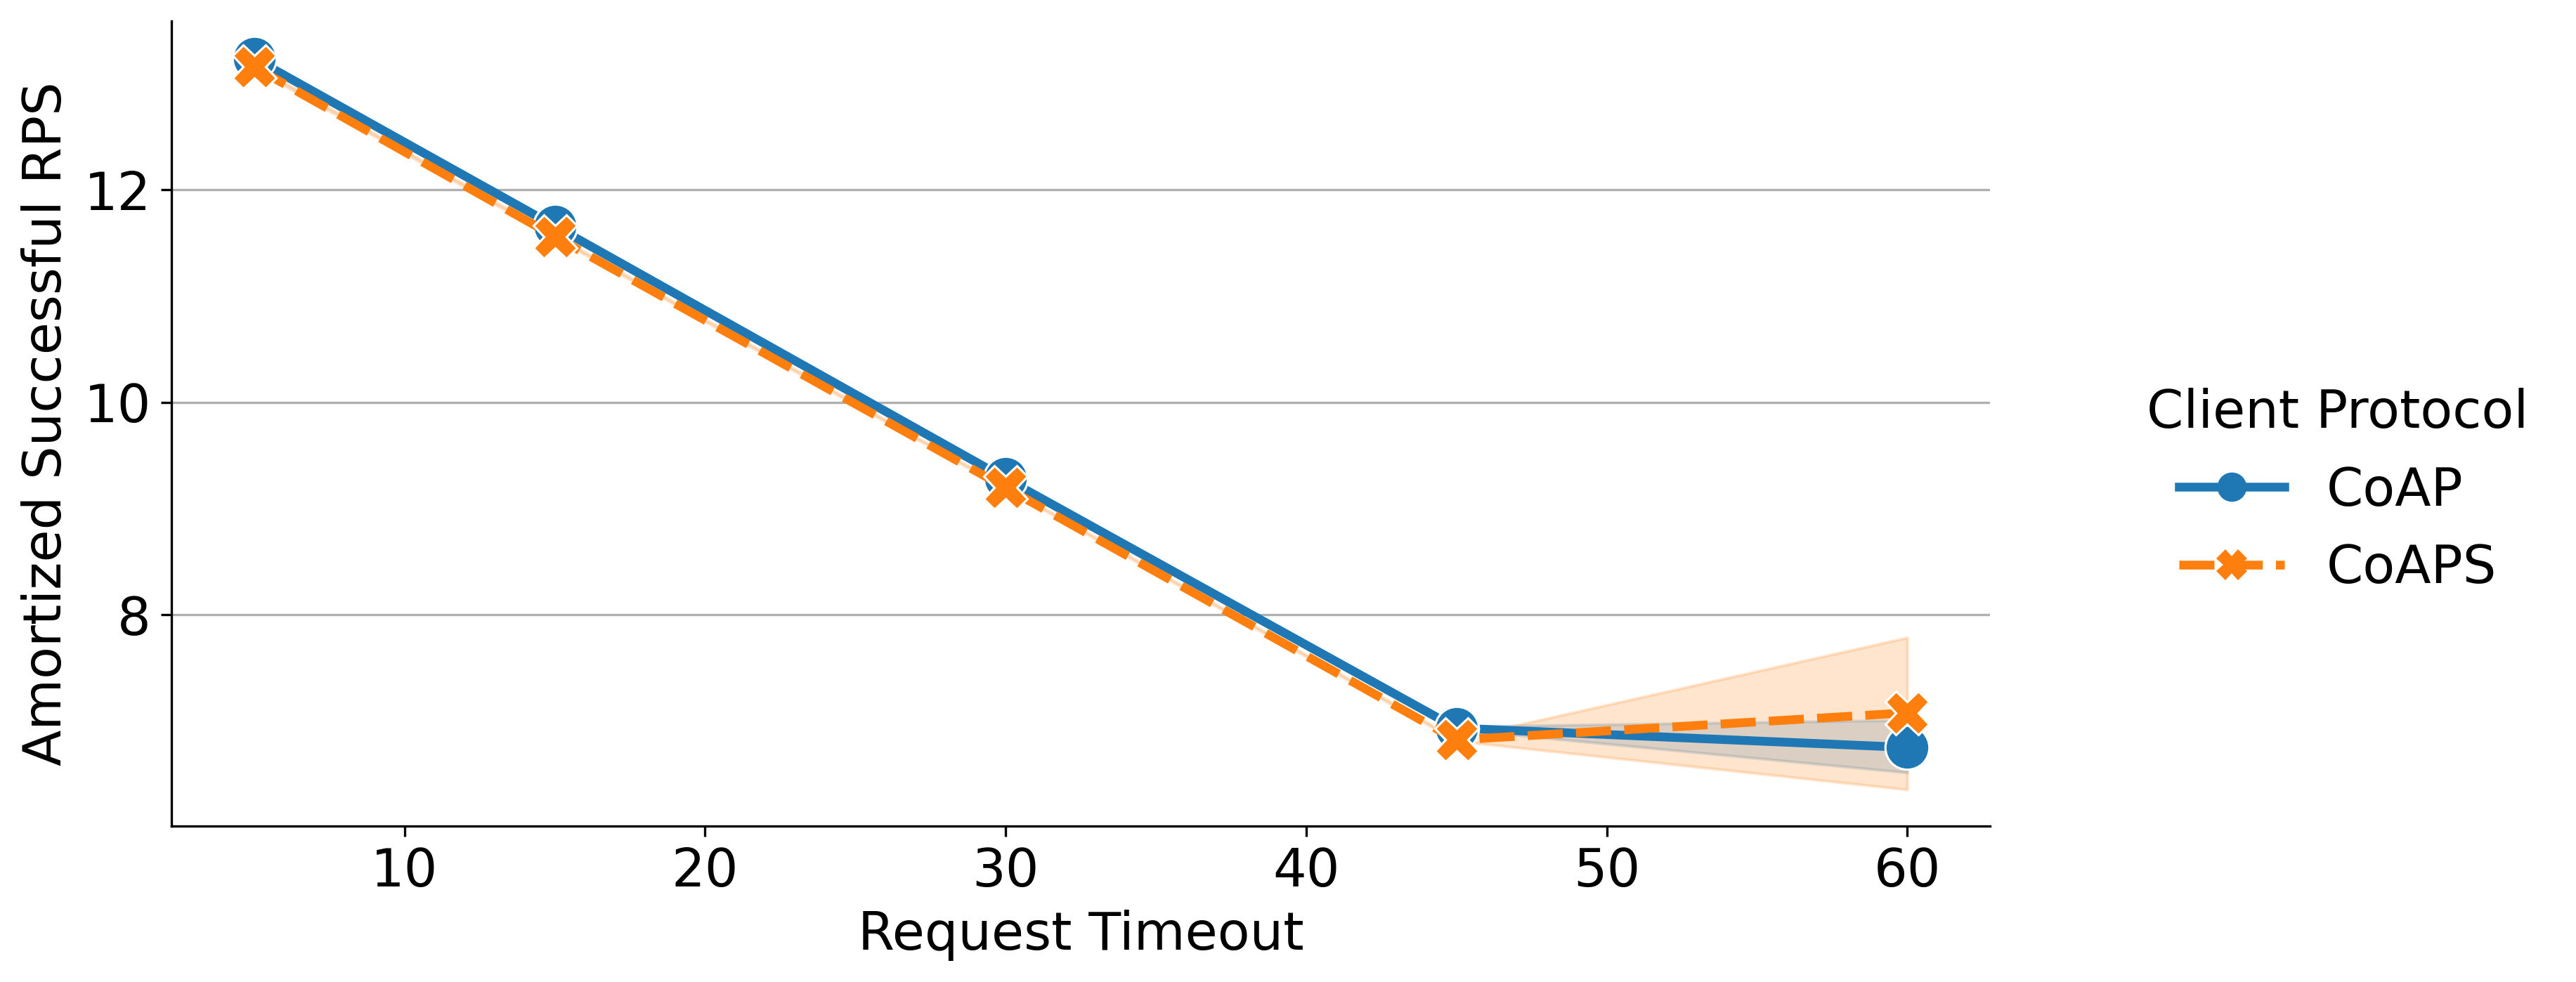

,exp_id,run_proxy_with_dtls,request_timeout,num_clients,trial,total_successful_messages,mean_active_time_sec,amortized_successful_rps
0,thesis_group_proxy_occ_timeout_8clients_withattacker_8000MBheap_50proxyconns_15sec_pxyto_coap_https__140sec_proxy__30sec_attacker__120sec_client,CoAP,15,8,1,11115,119.128680,11.662809
1,thesis_group_proxy_occ_timeout_8clients_withattacker_8000MBheap_50proxyconns_15sec_pxyto_coap_https__140sec_proxy__30sec_attacker__120sec_client,CoAP,15,8,2,11116,119.143688,11.662389
2,thesis_group_proxy_occ_timeout_8clients_withattacker_8000MBheap_50proxyconns_15sec_pxyto_coap_https__140sec_proxy__30sec_attacker__120sec_client,CoAP,15,8,3,11111,119.134720,11.658020
3,thesis_group_proxy_occ_timeout_8clients_withattacker_8000MBheap_50proxyconns_15sec_pxyto_coap_https__140sec_proxy__30sec_attacker__120sec_client,CoAP,15,8,4,11095,119.157403,11.639017
4,thesis_group_proxy_occ_timeout_8clients_withattacker_8000MBheap_50proxyconns_15sec_pxyto_coap_https__140sec_proxy__30sec_attacker__120sec_client,CoAP,15,8,5,11120,119.141741,11.666776
5,thesis_group_proxy_occ_timeout_8clients_withattacker_8000MBheap_50proxyconns_15sec_pxyto_dtls_https__140sec_proxy__30sec_attacker__120sec_client,CoAPS,15,8,1,11012,118.909586,11.576022
6,thesis_group_proxy_occ_timeout_8clients_withattacker_8000MBheap_50proxyconns_15sec_pxyto_dtls_https__140sec_proxy__30sec_attacker__120sec_client,CoAPS,15,8,2,10978,118.896652,11.541536
7,thesis_group_proxy_occ_timeout_8clients_withattacker_8000MBheap_50proxyconns_15sec_pxyto_dtls_https__140sec_proxy__30sec_attacker__120sec_client,CoAPS,15,8,3,11012,118.898978,11.577055
8,thesis_group_proxy_occ_timeout_8clients_withattacker_8000MBheap_50proxyconns_15sec_pxyto_dtls_https__140sec_proxy__30sec_attacker__120sec_client,CoAPS,15,8,4,10986,118.901387,11.549487
9,thesis_group_proxy_occ_timeout_8clients_withattacker_8000MBheap_50proxyconns_15sec_pxyto_dtls_https__140sec_proxy__30sec_attacker__120sec_client,CoAPS,15,8,5,10990,118.907395,11.553108


In [67]:
g = sns.relplot(
  data=df,
  kind="line",
  x="request_timeout",
  y="amortized_successful_rps",
  hue="run_proxy_with_dtls",
  style="run_proxy_with_dtls",
  aspect=2,
  markers=True,
  markersize=15,
)

g.set_xlabels("Request Timeout")
g.set_ylabels("Amortized Successful RPS")
g.legend.set_title("Client Protocol")
# g.refline(
#   y=100.0,
#   color="black",
#   linestyle="solid",
#   linewidth=0.05,
# )

plt.grid(True, axis="y")
plt.show()

df

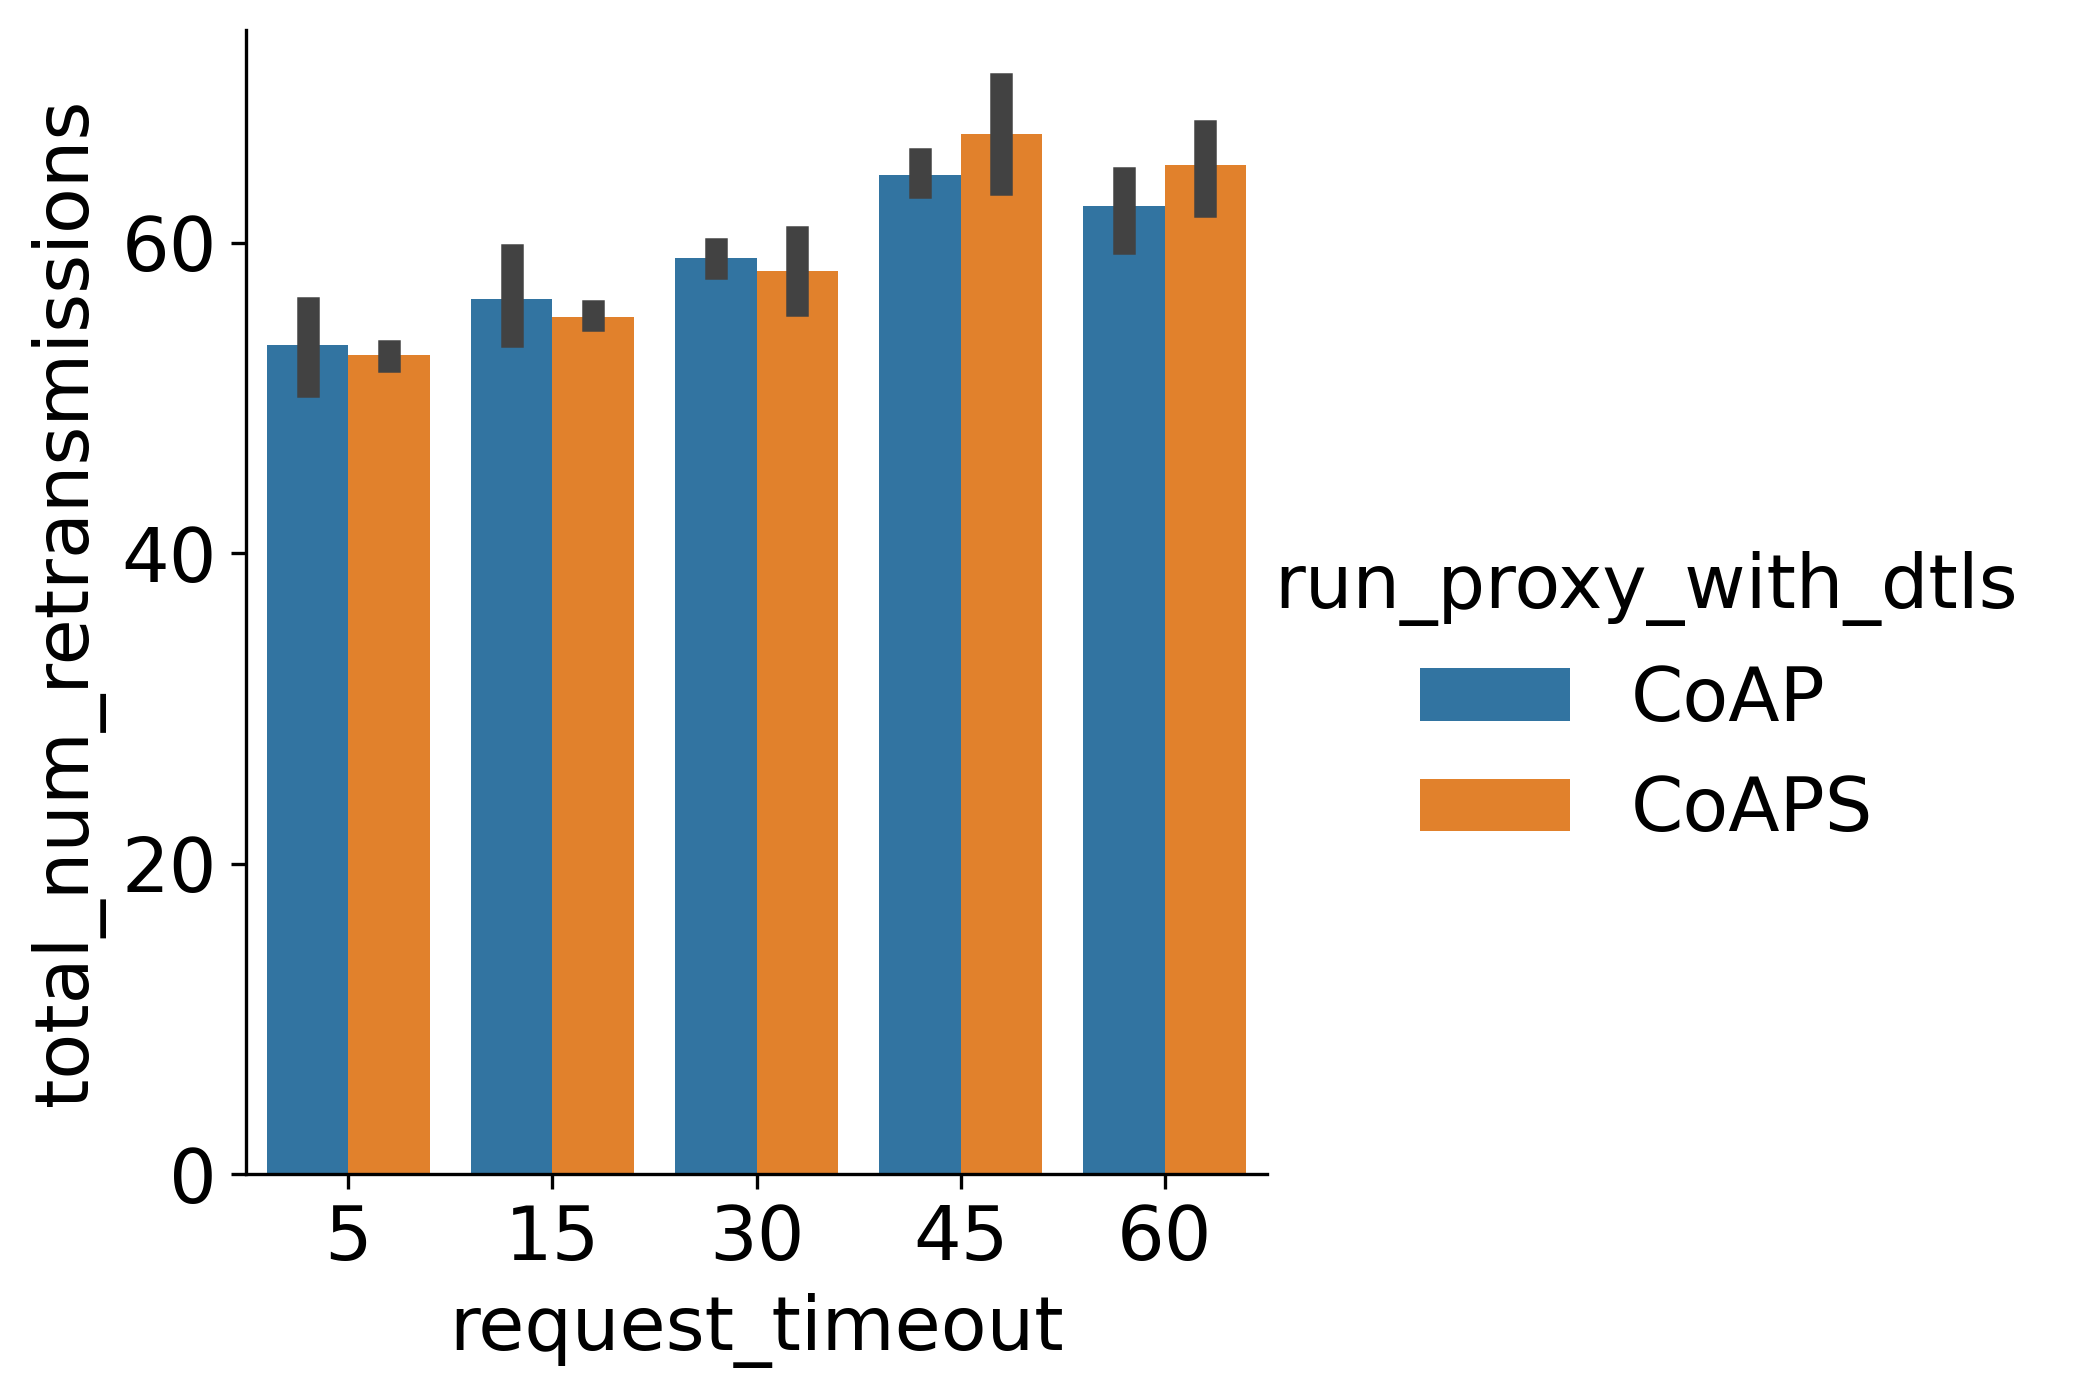

,exp_id,trial,num_clients,request_timeout,run_proxy_with_dtls,total_num_retransmissions
0,thesis_group_proxy_occ_timeout_8clients_withattacker_8000MBheap_50proxyconns_15sec_pxyto_coap_https__140sec_proxy__30sec_attacker__120sec_client,1,8,15,CoAP,57
1,thesis_group_proxy_occ_timeout_8clients_withattacker_8000MBheap_50proxyconns_15sec_pxyto_coap_https__140sec_proxy__30sec_attacker__120sec_client,2,8,15,CoAP,56
2,thesis_group_proxy_occ_timeout_8clients_withattacker_8000MBheap_50proxyconns_15sec_pxyto_coap_https__140sec_proxy__30sec_attacker__120sec_client,3,8,15,CoAP,56
3,thesis_group_proxy_occ_timeout_8clients_withattacker_8000MBheap_50proxyconns_15sec_pxyto_coap_https__140sec_proxy__30sec_attacker__120sec_client,4,8,15,CoAP,61
4,thesis_group_proxy_occ_timeout_8clients_withattacker_8000MBheap_50proxyconns_15sec_pxyto_coap_https__140sec_proxy__30sec_attacker__120sec_client,5,8,15,CoAP,52
5,thesis_group_proxy_occ_timeout_8clients_withattacker_8000MBheap_50proxyconns_15sec_pxyto_dtls_https__140sec_proxy__30sec_attacker__120sec_client,1,8,15,CoAPS,55
6,thesis_group_proxy_occ_timeout_8clients_withattacker_8000MBheap_50proxyconns_15sec_pxyto_dtls_https__140sec_proxy__30sec_attacker__120sec_client,2,8,15,CoAPS,55
7,thesis_group_proxy_occ_timeout_8clients_withattacker_8000MBheap_50proxyconns_15sec_pxyto_dtls_https__140sec_proxy__30sec_attacker__120sec_client,3,8,15,CoAPS,55
8,thesis_group_proxy_occ_timeout_8clients_withattacker_8000MBheap_50proxyconns_15sec_pxyto_dtls_https__140sec_proxy__30sec_attacker__120sec_client,4,8,15,CoAPS,55
9,thesis_group_proxy_occ_timeout_8clients_withattacker_8000MBheap_50proxyconns_15sec_pxyto_dtls_https__140sec_proxy__30sec_attacker__120sec_client,5,8,15,CoAPS,56


In [69]:
## Plot retransmissions as a function of clients and protocol.

df = (
  client_rps_df.groupby(by=["exp_id", "trial", "num_clients", "request_timeout", "run_proxy_with_dtls"])
  .agg(
    total_num_retransmissions=("total_num_retransmissions", "sum")
  )
  .reset_index()
)

g = sns.catplot(
  data=df,
  kind="bar",
  x="request_timeout",
  y="total_num_retransmissions",
  hue="run_proxy_with_dtls",
)
plt.show()

df[df["total_num_retransmissions"] > 0]

In [61]:
%%time

## Determine transaction success rate

# Combine send and receive events for clients.
client_events_df = client_sends_df.merge(client_recvs_df, on=["exp_id", "trial", "observer_id", "message_marker"], how="left")
client_events_df.rename(columns={
  "observe_timestamp_x": "send_timestamp",
  "observe_timestamp_y": "recv_timestamp",
}, inplace=True)
client_events_df["rtt_ms"] = 1e3 * (client_events_df["recv_timestamp"] - client_events_df["send_timestamp"])

# Edge case: sometimes clients will not receive a
# response back at the end of the experiment, so
# we ignore those messages, if any.
grouped_last_nan_indicies_to_remove = (
  client_events_df.reset_index()[
    client_events_df["recv_timestamp"].isna()
  ]
  .groupby(by=["exp_id", "trial", "observer_id", "message_marker"])
  .agg(
    last_nan_recv_timestamp=("recv_timestamp", "last"),
    original_index=("index", "last"),
  )
  .reset_index()
  ["original_index"]
  .unique()
)
client_events_df.drop(index=grouped_last_nan_indicies_to_remove, inplace=True)
client_events_df.reset_index(inplace=True)
client_events_df.drop(columns=["index"], inplace=True)

# Produce the total number of messages, and number 
# messages with a matching successful response.
grouped_client_events_df = (
  client_events_df
  .groupby(["exp_id", "trial", "observer_id"])
  .agg(
    unique_message_markers=("message_marker", "nunique"),
    num_successful_messages=("successful_message", "sum"),
  )
  .reset_index()
)

# Now compute the successful transaction rate.
grouped_client_events_df["transaction_success_rate"] = 100 * grouped_client_events_df["num_successful_messages"] / grouped_client_events_df["unique_message_markers"]

grouped_client_events_df = (
  grouped_client_events_df
  .merge(exp_df, on="exp_id", how="left")
  .replace({
    "run_proxy_with_dtls": {
      True : "CoAPS",
      False: "CoAP",
    },
  })
)

grouped_client_events_df

CPU times: user 1.57 s, sys: 138 ms, total: 1.71 s
Wall time: 1.71 s


,exp_id,trial,observer_id,unique_message_markers,num_successful_messages,transaction_success_rate,attacker_rate,server_connections,max_keep_alive_requests,num_clients,...,topology_name,num_proxy_connections,request_timeout,max_retries,keep_alive_duration,request_retry_interval,reuse_connections,run_proxy_with_dtls,run_proxy_with_https,run_attacker
0,thesis_group_proxy_occ_timeout_8clients_withattacker_8000MBheap_50proxyconns_15sec_pxyto_coap_https__140sec_proxy__30sec_attacker__120sec_client,1,client1,1382,1385,100.217077,100mbps,256,0,8,...,thesis_cloud_proxy_and_internet_attacker,50,15,2,5,1,True,CoAP,True,True
1,thesis_group_proxy_occ_timeout_8clients_withattacker_8000MBheap_50proxyconns_15sec_pxyto_coap_https__140sec_proxy__30sec_attacker__120sec_client,1,client2,1391,1392,100.071891,100mbps,256,0,8,...,thesis_cloud_proxy_and_internet_attacker,50,15,2,5,1,True,CoAP,True,True
2,thesis_group_proxy_occ_timeout_8clients_withattacker_8000MBheap_50proxyconns_15sec_pxyto_coap_https__140sec_proxy__30sec_attacker__120sec_client,1,client3,1385,1386,100.072202,100mbps,256,0,8,...,thesis_cloud_proxy_and_internet_attacker,50,15,2,5,1,True,CoAP,True,True
3,thesis_group_proxy_occ_timeout_8clients_withattacker_8000MBheap_50proxyconns_15sec_pxyto_coap_https__140sec_proxy__30sec_attacker__120sec_client,1,client4,1392,1393,100.071839,100mbps,256,0,8,...,thesis_cloud_proxy_and_internet_attacker,50,15,2,5,1,True,CoAP,True,True
4,thesis_group_proxy_occ_timeout_8clients_withattacker_8000MBheap_50proxyconns_15sec_pxyto_coap_https__140sec_proxy__30sec_attacker__120sec_client,1,client5,1393,1397,100.28715,100mbps,256,0,8,...,thesis_cloud_proxy_and_internet_attacker,50,15,2,5,1,True,CoAP,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,thesis_group_proxy_occ_timeout_8clients_withattacker_8000MBheap_50proxyconns_60sec_pxyto_dtls_https__140sec_proxy__30sec_attacker__120sec_client,5,client4,635,638,100.472441,100mbps,256,0,8,...,thesis_cloud_proxy_and_internet_attacker,50,60,2,5,1,True,CoAPS,True,True
396,thesis_group_proxy_occ_timeout_8clients_withattacker_8000MBheap_50proxyconns_60sec_pxyto_dtls_https__140sec_proxy__30sec_attacker__120sec_client,5,client5,616,618,100.324675,100mbps,256,0,8,...,thesis_cloud_proxy_and_internet_attacker,50,60,2,5,1,True,CoAPS,True,True
397,thesis_group_proxy_occ_timeout_8clients_withattacker_8000MBheap_50proxyconns_60sec_pxyto_dtls_https__140sec_proxy__30sec_attacker__120sec_client,5,client6,597,601,100.670017,100mbps,256,0,8,...,thesis_cloud_proxy_and_internet_attacker,50,60,2,5,1,True,CoAPS,True,True
398,thesis_group_proxy_occ_timeout_8clients_withattacker_8000MBheap_50proxyconns_60sec_pxyto_dtls_https__140sec_proxy__30sec_attacker__120sec_client,5,client7,577,579,100.34662,100mbps,256,0,8,...,thesis_cloud_proxy_and_internet_attacker,50,60,2,5,1,True,CoAPS,True,True


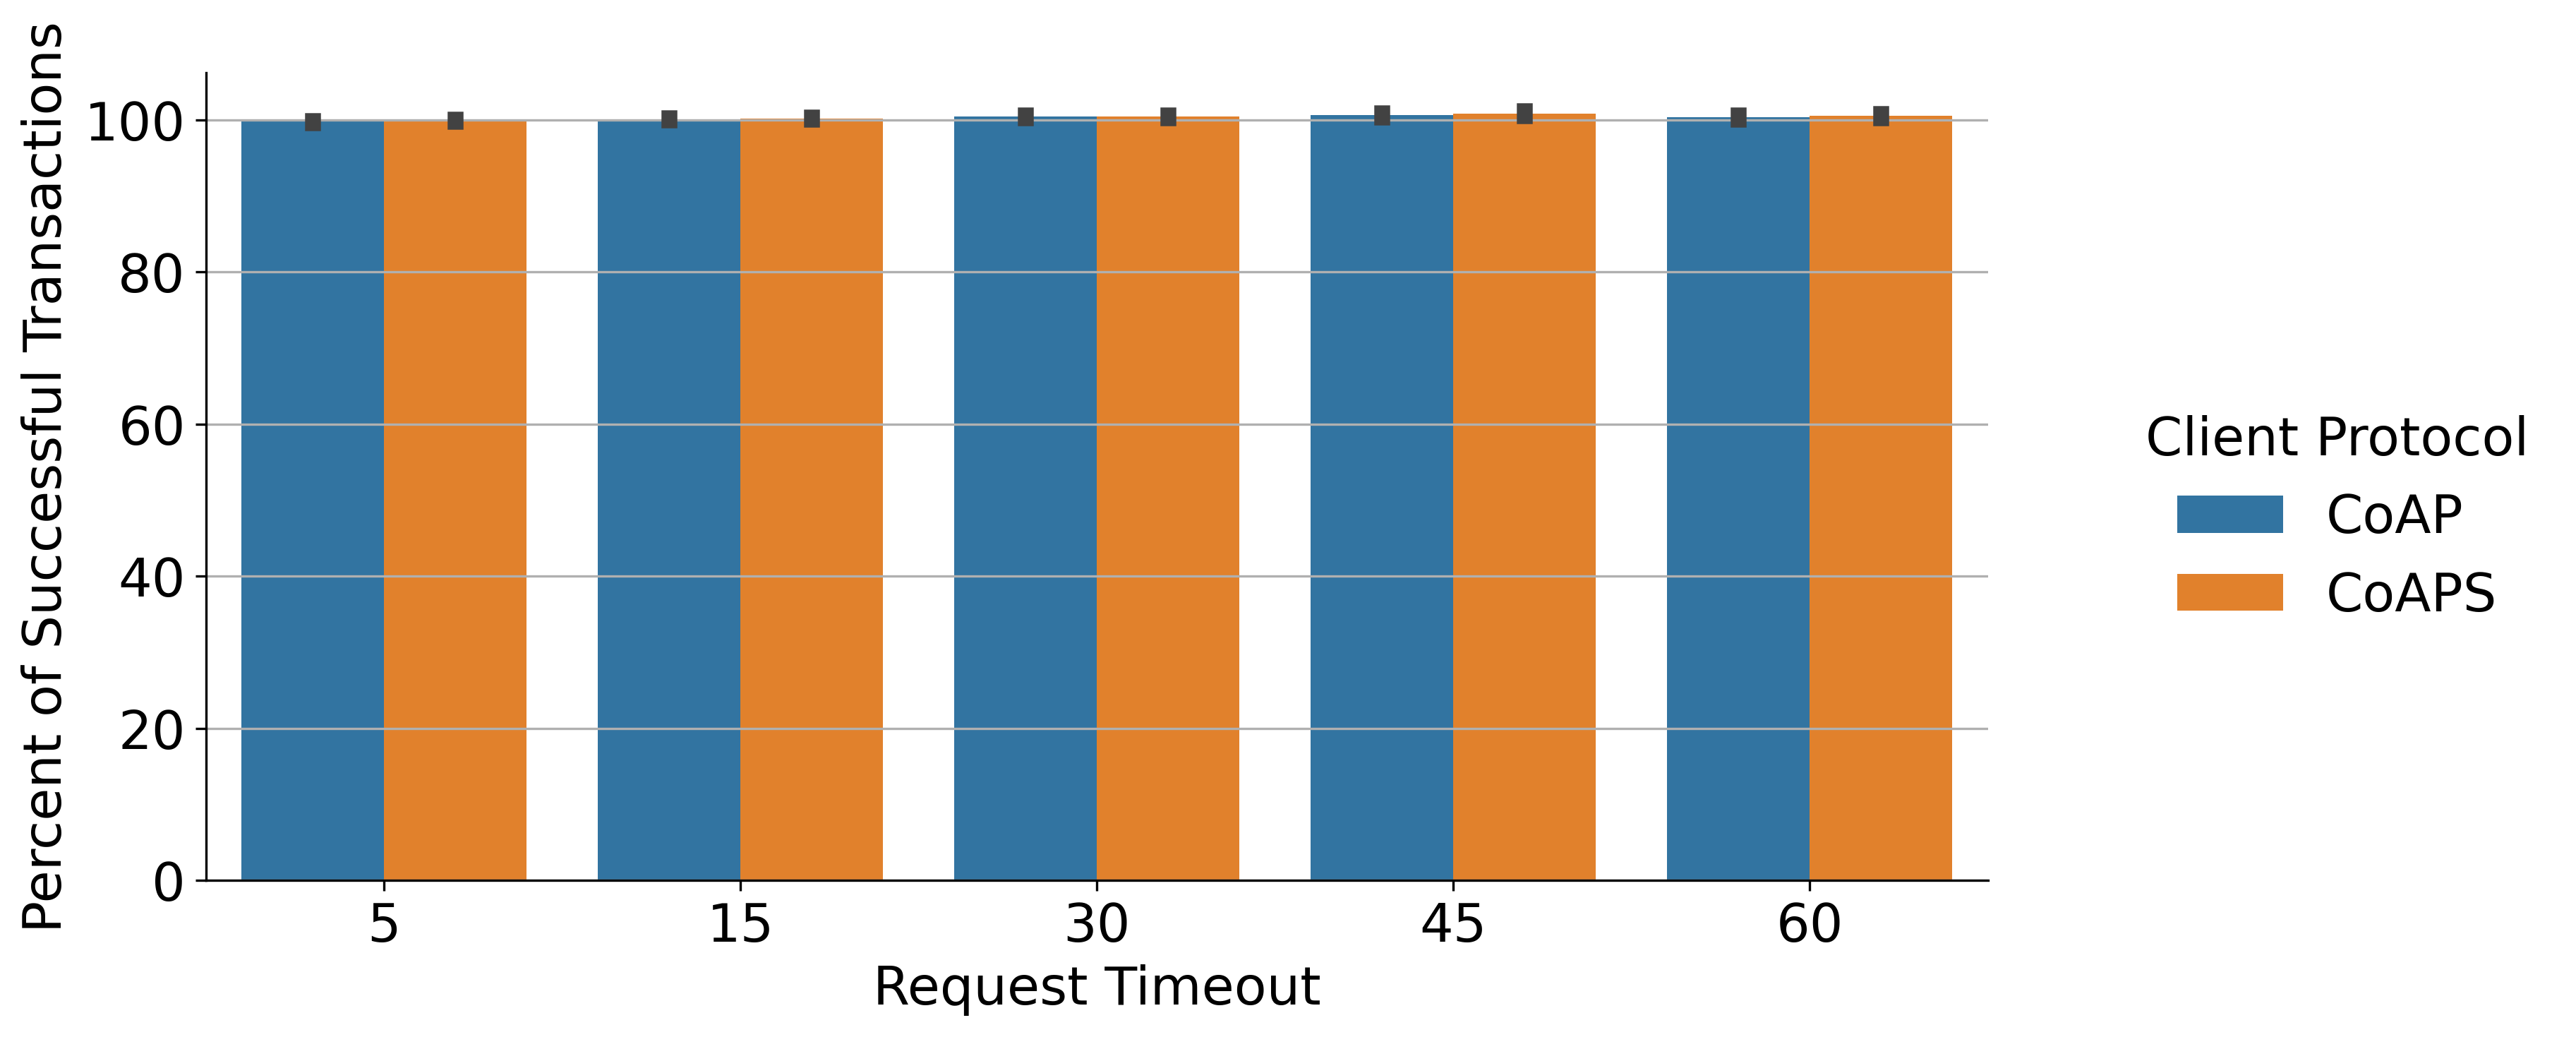

,exp_id,trial,observer_id,unique_message_markers,num_successful_messages,transaction_success_rate,attacker_rate,server_connections,max_keep_alive_requests,num_clients,...,topology_name,num_proxy_connections,request_timeout,max_retries,keep_alive_duration,request_retry_interval,reuse_connections,run_proxy_with_dtls,run_proxy_with_https,run_attacker
14,thesis_group_proxy_occ_timeout_8clients_withattacker_8000MBheap_50proxyconns_15sec_pxyto_coap_https__140sec_proxy__30sec_attacker__120sec_client,2,client7,1393,1392,99.928212,100mbps,256,0,8,...,thesis_cloud_proxy_and_internet_attacker,50,15,2,5,1,True,CoAP,True,True
20,thesis_group_proxy_occ_timeout_8clients_withattacker_8000MBheap_50proxyconns_15sec_pxyto_coap_https__140sec_proxy__30sec_attacker__120sec_client,3,client5,1392,1391,99.928161,100mbps,256,0,8,...,thesis_cloud_proxy_and_internet_attacker,50,15,2,5,1,True,CoAP,True,True
65,thesis_group_proxy_occ_timeout_8clients_withattacker_8000MBheap_50proxyconns_15sec_pxyto_dtls_https__140sec_proxy__30sec_attacker__120sec_client,4,client2,1372,1371,99.927114,100mbps,256,0,8,...,thesis_cloud_proxy_and_internet_attacker,50,15,2,5,1,True,CoAPS,True,True
77,thesis_group_proxy_occ_timeout_8clients_withattacker_8000MBheap_50proxyconns_15sec_pxyto_dtls_https__140sec_proxy__30sec_attacker__120sec_client,5,client6,1377,1376,99.927378,100mbps,256,0,8,...,thesis_cloud_proxy_and_internet_attacker,50,15,2,5,1,True,CoAPS,True,True
240,thesis_group_proxy_occ_timeout_8clients_withattacker_8000MBheap_50proxyconns_5sec_pxyto_coap_https__140sec_proxy__30sec_attacker__120sec_client,1,client1,1568,1567,99.936224,100mbps,256,0,8,...,thesis_cloud_proxy_and_internet_attacker,50,5,2,5,1,True,CoAP,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
312,thesis_group_proxy_occ_timeout_8clients_withattacker_8000MBheap_50proxyconns_5sec_pxyto_dtls_https__140sec_proxy__30sec_attacker__120sec_client,5,client1,1563,1558,99.680102,100mbps,256,0,8,...,thesis_cloud_proxy_and_internet_attacker,50,5,2,5,1,True,CoAPS,True,True
313,thesis_group_proxy_occ_timeout_8clients_withattacker_8000MBheap_50proxyconns_5sec_pxyto_dtls_https__140sec_proxy__30sec_attacker__120sec_client,5,client2,1571,1567,99.745385,100mbps,256,0,8,...,thesis_cloud_proxy_and_internet_attacker,50,5,2,5,1,True,CoAPS,True,True
314,thesis_group_proxy_occ_timeout_8clients_withattacker_8000MBheap_50proxyconns_5sec_pxyto_dtls_https__140sec_proxy__30sec_attacker__120sec_client,5,client3,1567,1563,99.744735,100mbps,256,0,8,...,thesis_cloud_proxy_and_internet_attacker,50,5,2,5,1,True,CoAPS,True,True
318,thesis_group_proxy_occ_timeout_8clients_withattacker_8000MBheap_50proxyconns_5sec_pxyto_dtls_https__140sec_proxy__30sec_attacker__120sec_client,5,client7,1574,1570,99.74587,100mbps,256,0,8,...,thesis_cloud_proxy_and_internet_attacker,50,5,2,5,1,True,CoAPS,True,True


In [70]:
df = grouped_client_events_df

g = sns.catplot(
  data=df,
  kind="bar",
  x="request_timeout",
  y="transaction_success_rate",
  hue="run_proxy_with_dtls",
  ci="sd",
  aspect=2,
)

g.set_xlabels("Request Timeout")
g.set_ylabels("Percent of Successful Transactions")
g.legend.set_title("Client Protocol")
# g.refline(
#   y=100.0,
#   color="black",
#   linestyle="solid",
#   linewidth=0.05,
# )

plt.grid(True, axis="y")
plt.show()

grouped_client_events_df[
  grouped_client_events_df["transaction_success_rate"] < 100
]

In [63]:
# _df = client_events_df
# tdf = _df[
#   (_df["exp_id"] == "thesis_group_num_clients_dtls_https_7clients_noattacker__140sec_proxy__30sec_attacker__120sec_client")
#   & (_df["trial"] == 5)
#   & (_df["observer_id"] == "client3")
# ].reset_index().drop(columns=["index"])
# tdf[
#   tdf["response_code"] != "content"
# ]

,exp_id,send_timestamp,trial,observer_id,message_marker,coap_retransmitted,recv_timestamp,response_code,successful_message,rtt_ms


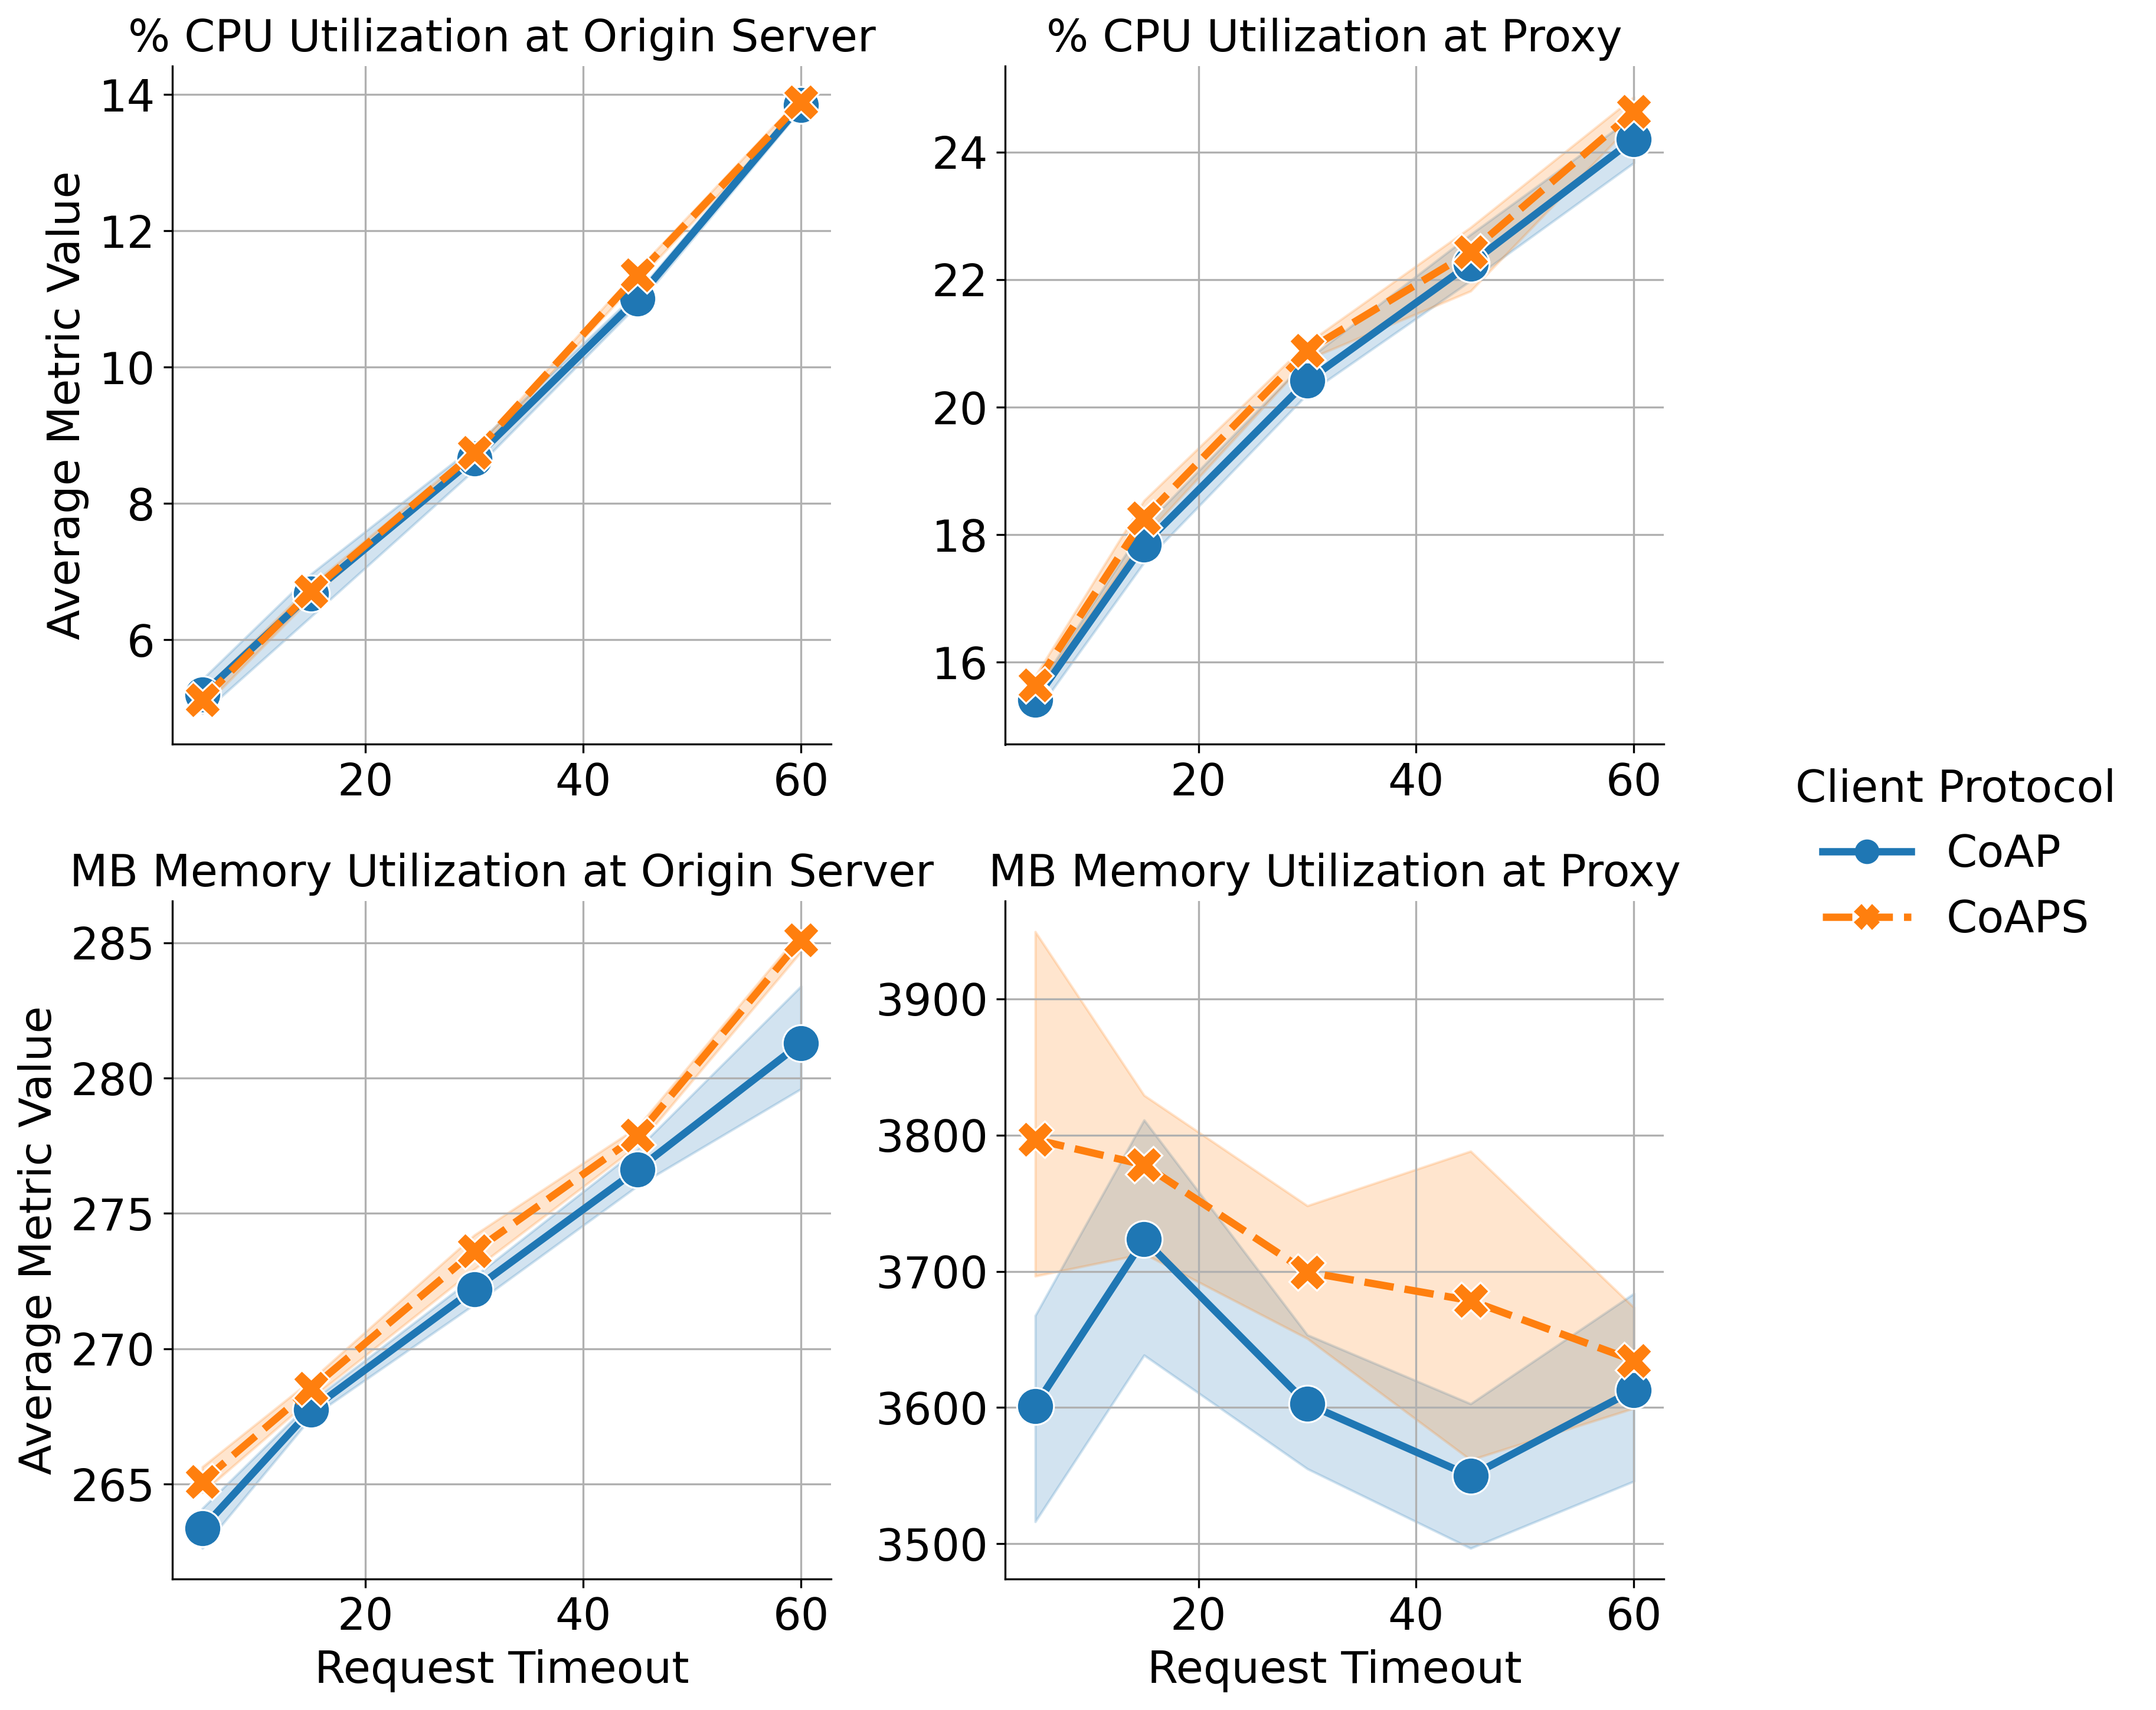

CPU times: user 3.57 s, sys: 418 ms, total: 3.99 s
Wall time: 3.68 s


,exp_id,trial,observer_id,metric_type,avg_value,min_value,max_value,attacker_rate,server_connections,max_keep_alive_requests,...,topology_name,num_proxy_connections,request_timeout,max_retries,keep_alive_duration,request_retry_interval,reuse_connections,run_proxy_with_dtls,run_proxy_with_https,run_attacker
0,thesis_group_proxy_occ_timeout_8clients_withattacker_8000MBheap_50proxyconns_15sec_pxyto_coap_https__140sec_proxy__30sec_attacker__120sec_client,1,Origin Server,% CPU Utilization,6.491429,0.4,23.7,100mbps,256,0,...,thesis_cloud_proxy_and_internet_attacker,50,15,2,5,1,True,CoAP,True,True
1,thesis_group_proxy_occ_timeout_8clients_withattacker_8000MBheap_50proxyconns_15sec_pxyto_coap_https__140sec_proxy__30sec_attacker__120sec_client,1,Proxy,% CPU Utilization,17.980714,0.5,84.2,100mbps,256,0,...,thesis_cloud_proxy_and_internet_attacker,50,15,2,5,1,True,CoAP,True,True
2,thesis_group_proxy_occ_timeout_8clients_withattacker_8000MBheap_50proxyconns_15sec_pxyto_coap_https__140sec_proxy__30sec_attacker__120sec_client,1,Origin Server,MB Memory Utilization,267.271523,242.0,298.0,100mbps,256,0,...,thesis_cloud_proxy_and_internet_attacker,50,15,2,5,1,True,CoAP,True,True
3,thesis_group_proxy_occ_timeout_8clients_withattacker_8000MBheap_50proxyconns_15sec_pxyto_coap_https__140sec_proxy__30sec_attacker__120sec_client,1,Proxy,MB Memory Utilization,3619.836394,248.0,6077.0,100mbps,256,0,...,thesis_cloud_proxy_and_internet_attacker,50,15,2,5,1,True,CoAP,True,True
4,thesis_group_proxy_occ_timeout_8clients_withattacker_8000MBheap_50proxyconns_15sec_pxyto_coap_https__140sec_proxy__30sec_attacker__120sec_client,2,Origin Server,% CPU Utilization,6.098571,0.5,22.1,100mbps,256,0,...,thesis_cloud_proxy_and_internet_attacker,50,15,2,5,1,True,CoAP,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,thesis_group_proxy_occ_timeout_8clients_withattacker_8000MBheap_50proxyconns_60sec_pxyto_dtls_https__140sec_proxy__30sec_attacker__120sec_client,4,Proxy,MB Memory Utilization,3628.232441,252.0,6385.0,100mbps,256,0,...,thesis_cloud_proxy_and_internet_attacker,50,60,2,5,1,True,CoAPS,True,True
196,thesis_group_proxy_occ_timeout_8clients_withattacker_8000MBheap_50proxyconns_60sec_pxyto_dtls_https__140sec_proxy__30sec_attacker__120sec_client,5,Origin Server,% CPU Utilization,13.940714,0.4,26.7,100mbps,256,0,...,thesis_cloud_proxy_and_internet_attacker,50,60,2,5,1,True,CoAPS,True,True
197,thesis_group_proxy_occ_timeout_8clients_withattacker_8000MBheap_50proxyconns_60sec_pxyto_dtls_https__140sec_proxy__30sec_attacker__120sec_client,5,Proxy,% CPU Utilization,24.487857,0.4,85.7,100mbps,256,0,...,thesis_cloud_proxy_and_internet_attacker,50,60,2,5,1,True,CoAPS,True,True
198,thesis_group_proxy_occ_timeout_8clients_withattacker_8000MBheap_50proxyconns_60sec_pxyto_dtls_https__140sec_proxy__30sec_attacker__120sec_client,5,Origin Server,MB Memory Utilization,285.458472,256.0,335.0,100mbps,256,0,...,thesis_cloud_proxy_and_internet_attacker,50,60,2,5,1,True,CoAPS,True,True


In [72]:
%%time

## Measure proxy and server metrics.

df = (
  metric_df.replace({
    "metric_type": {
      "cpu_utilization": "% CPU Utilization",
      "memory_utilization": "MB Memory Utilization",
    },
    "observer_id": {
      "proxy": "Proxy",
      "originserver": "Origin Server",
    },
  })
)

g = sns.relplot(
  data=df,
  kind="line",
  x="request_timeout",
  y="avg_value",
  col="observer_id",
  row="metric_type",
  hue="run_proxy_with_dtls",
  style="run_proxy_with_dtls",
  markers=True,
  markersize=15,
  facet_kws={
    "sharey": False,
    "sharex": False,
  },
)

g.set_titles(
  template="{row_name} at {col_name}",
  col_template="{col_name}",
  row_template="{row_name}",
)
g.set_xlabels("Request Timeout")
g.set_ylabels("Average Metric Value")
g.legend.set_title("Client Protocol")
# g.set(xticks=np.arange(1,9,1))

g.axes[0,0].grid(True, axis="both")
g.axes[0,1].grid(True, axis="both")
g.axes[1,0].grid(True, axis="both")
g.axes[1,1].grid(True, axis="both")

fig.tight_layout()

plt.show()

df

In [38]:
%%time

## Measure proxy and server connection management.
##
## We currently do not insert connection events to
## the database, so we have to read from the processed
## connection files.

ALL_EXPERIMENTS_DATA_HOME = "/home/ubuntu/dos-californium/deter/expdata/real/final"

def read_exp_trial_node_connections(exp_id):
  """
  Read all processed connection dumps in an experiment `exp_id`.
  """
  experiment_dir = os.path.join(ALL_EXPERIMENTS_DATA_HOME, exp_id)

  df = (
    pl
    .scan_parquet(
      f"{experiment_dir}/*/{exp_id}.connections.parquet"
    )
  )
  lazy_dfs.append(df)

lazy_dfs = list()
for exp_id in exp_df["exp_id"].unique():
  read_exp_trial_node_connections(exp_id)

connections_df = (
  pl
  .concat(lazy_dfs)

  # Filter for proxy's view of syn-acks or fin-acks coming from server
  .filter(
    (pl.col("observer_id") == "proxy")
    & ((pl.col("is_syn") == 1) | (pl.col("is_fin") == 1))
    & (pl.col("info").str.contains(", ACK]"))
    & (pl.col("src_port") == 443)
  )
  # Group by experiment, trial, and observer, then accummulate
  # syn-acks and fin-acks in a list, along with their corresponding
  # timestamps of occurrence for each group.
  .groupby(
    by=["exp_id", "trial", "observer_id"],
    maintain_order=True
  )
  .agg([
    pl.col("timestamp").alias("timestamp"),
    pl.col("is_syn").cumsum().alias("cum_syn"),
    pl.col("is_fin").cumsum().alias("cum_fin"),
  ])
  # Explode the cumulative syns and fins, and their times, then
  # subtract them to get a view of how many open connections there
  # are in the experiment as a function of time
  .explode(columns=["timestamp", "cum_syn", "cum_fin"])
  .with_columns([
    (pl.col("cum_syn") - pl.col("cum_fin")).alias("open_connections")
  ])

  # And finally convert to pandas for plotting.
  .collect()
  .to_pandas()
)

# This method of counting does not include the original 0 connections
# at time 0 for each node in each trial -- so we add that manually.
records = list()
for e in connections_df["exp_id"].unique():
  for t in connections_df["trial"].unique():
    for o in connections_df["observer_id"].unique():
      records.append({
        "exp_id"          : e,
        "trial"           : t,
        "observer_id"     : o,
        "timestamp"       : 0.0,
        "cum_syn"         : 0,
        "cum_fin"         : 0,
        "open_connections": 0,
      })
connections_df = (
  pd.concat(
    [connections_df, pd.DataFrame.from_records(records)]
  )
  .sort_values(by=["exp_id", "trial", "observer_id", "timestamp"])
)

# This method also does not include a connection count at the last time
# the proxy is meant to be active -- so we fill that value in based on the
# last value.
last_connection_df = (
  connections_df
  .groupby(by=["exp_id", "trial", "observer_id"], sort=True)
  .agg(
    max_timestamp=("timestamp", "max"),
    last_timestamp=("timestamp", "last"),
    max_open_connections=("open_connections", "max"),
    last_open_connections=("open_connections", "last"),
    last_cum_syn=("cum_syn", "last"),
    last_cum_fin=("cum_fin", "last"),
  )
  .reset_index()
)
# assert last_connection_df["max_timestamp"].equals(last_connection_df["last_timestamp"])
# assert last_connection_df["max_open_connections"].equals(last_connection_df["last_open_connections"])
records = list()
for r in last_connection_df.to_dict(orient="records"):
  records.append({
    "exp_id"          : r["exp_id"],
    "trial"           : r["trial"],
    "observer_id"     : r["observer_id"],
    "timestamp"       : 140,
    "cum_syn"         : r["last_cum_syn"],
    "cum_fin"         : r["last_cum_fin"],
    "open_connections": r["last_open_connections"],
  })
connections_df = (
  pd.concat(
    [connections_df, pd.DataFrame.from_records(records)]
  )
  .sort_values(by=["exp_id", "trial", "observer_id", "timestamp"])
)

connections_df = (
  connections_df
  .merge(exp_df, on="exp_id", how="left")
  .replace({
    "run_proxy_with_dtls": {
      True : "CoAPS",
      False: "CoAP",
    },
  })
)

connections_df

CPU times: user 2min 48s, sys: 3min 27s, total: 6min 16s
Wall time: 20.6 s


,exp_id,trial,observer_id,timestamp,cum_syn,cum_fin,open_connections,attacker_rate,server_connections,max_keep_alive_requests,...,topology_name,num_proxy_connections,request_timeout,max_retries,keep_alive_duration,request_retry_interval,reuse_connections,run_proxy_with_dtls,run_proxy_with_https,run_attacker
0,thesis_group_proxy_occ_timeout_8clients_withattacker_8000MBheap_50proxyconns_15sec_pxyto_coap_https__140sec_proxy__30sec_attacker__120sec_client,1,proxy,0.000000,0,0,0,100mbps,256,0,...,thesis_cloud_proxy_and_internet_attacker,50,15,2,5,1,True,CoAP,True,True
1,thesis_group_proxy_occ_timeout_8clients_withattacker_8000MBheap_50proxyconns_15sec_pxyto_coap_https__140sec_proxy__30sec_attacker__120sec_client,1,proxy,0.065019,1,0,1,100mbps,256,0,...,thesis_cloud_proxy_and_internet_attacker,50,15,2,5,1,True,CoAP,True,True
2,thesis_group_proxy_occ_timeout_8clients_withattacker_8000MBheap_50proxyconns_15sec_pxyto_coap_https__140sec_proxy__30sec_attacker__120sec_client,1,proxy,2.067345,2,0,2,100mbps,256,0,...,thesis_cloud_proxy_and_internet_attacker,50,15,2,5,1,True,CoAP,True,True
3,thesis_group_proxy_occ_timeout_8clients_withattacker_8000MBheap_50proxyconns_15sec_pxyto_coap_https__140sec_proxy__30sec_attacker__120sec_client,1,proxy,3.186998,3,0,3,100mbps,256,0,...,thesis_cloud_proxy_and_internet_attacker,50,15,2,5,1,True,CoAP,True,True
4,thesis_group_proxy_occ_timeout_8clients_withattacker_8000MBheap_50proxyconns_15sec_pxyto_coap_https__140sec_proxy__30sec_attacker__120sec_client,1,proxy,6.052259,4,0,4,100mbps,256,0,...,thesis_cloud_proxy_and_internet_attacker,50,15,2,5,1,True,CoAP,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5465,thesis_group_proxy_occ_timeout_8clients_withattacker_8000MBheap_50proxyconns_60sec_pxyto_dtls_https__140sec_proxy__30sec_attacker__120sec_client,5,proxy,132.344436,52,49,3,100mbps,256,0,...,thesis_cloud_proxy_and_internet_attacker,50,60,2,5,1,True,CoAPS,True,True
5466,thesis_group_proxy_occ_timeout_8clients_withattacker_8000MBheap_50proxyconns_60sec_pxyto_dtls_https__140sec_proxy__30sec_attacker__120sec_client,5,proxy,132.344472,52,50,2,100mbps,256,0,...,thesis_cloud_proxy_and_internet_attacker,50,60,2,5,1,True,CoAPS,True,True
5467,thesis_group_proxy_occ_timeout_8clients_withattacker_8000MBheap_50proxyconns_60sec_pxyto_dtls_https__140sec_proxy__30sec_attacker__120sec_client,5,proxy,132.344504,52,51,1,100mbps,256,0,...,thesis_cloud_proxy_and_internet_attacker,50,60,2,5,1,True,CoAPS,True,True
5468,thesis_group_proxy_occ_timeout_8clients_withattacker_8000MBheap_50proxyconns_60sec_pxyto_dtls_https__140sec_proxy__30sec_attacker__120sec_client,5,proxy,132.344555,52,52,0,100mbps,256,0,...,thesis_cloud_proxy_and_internet_attacker,50,60,2,5,1,True,CoAPS,True,True


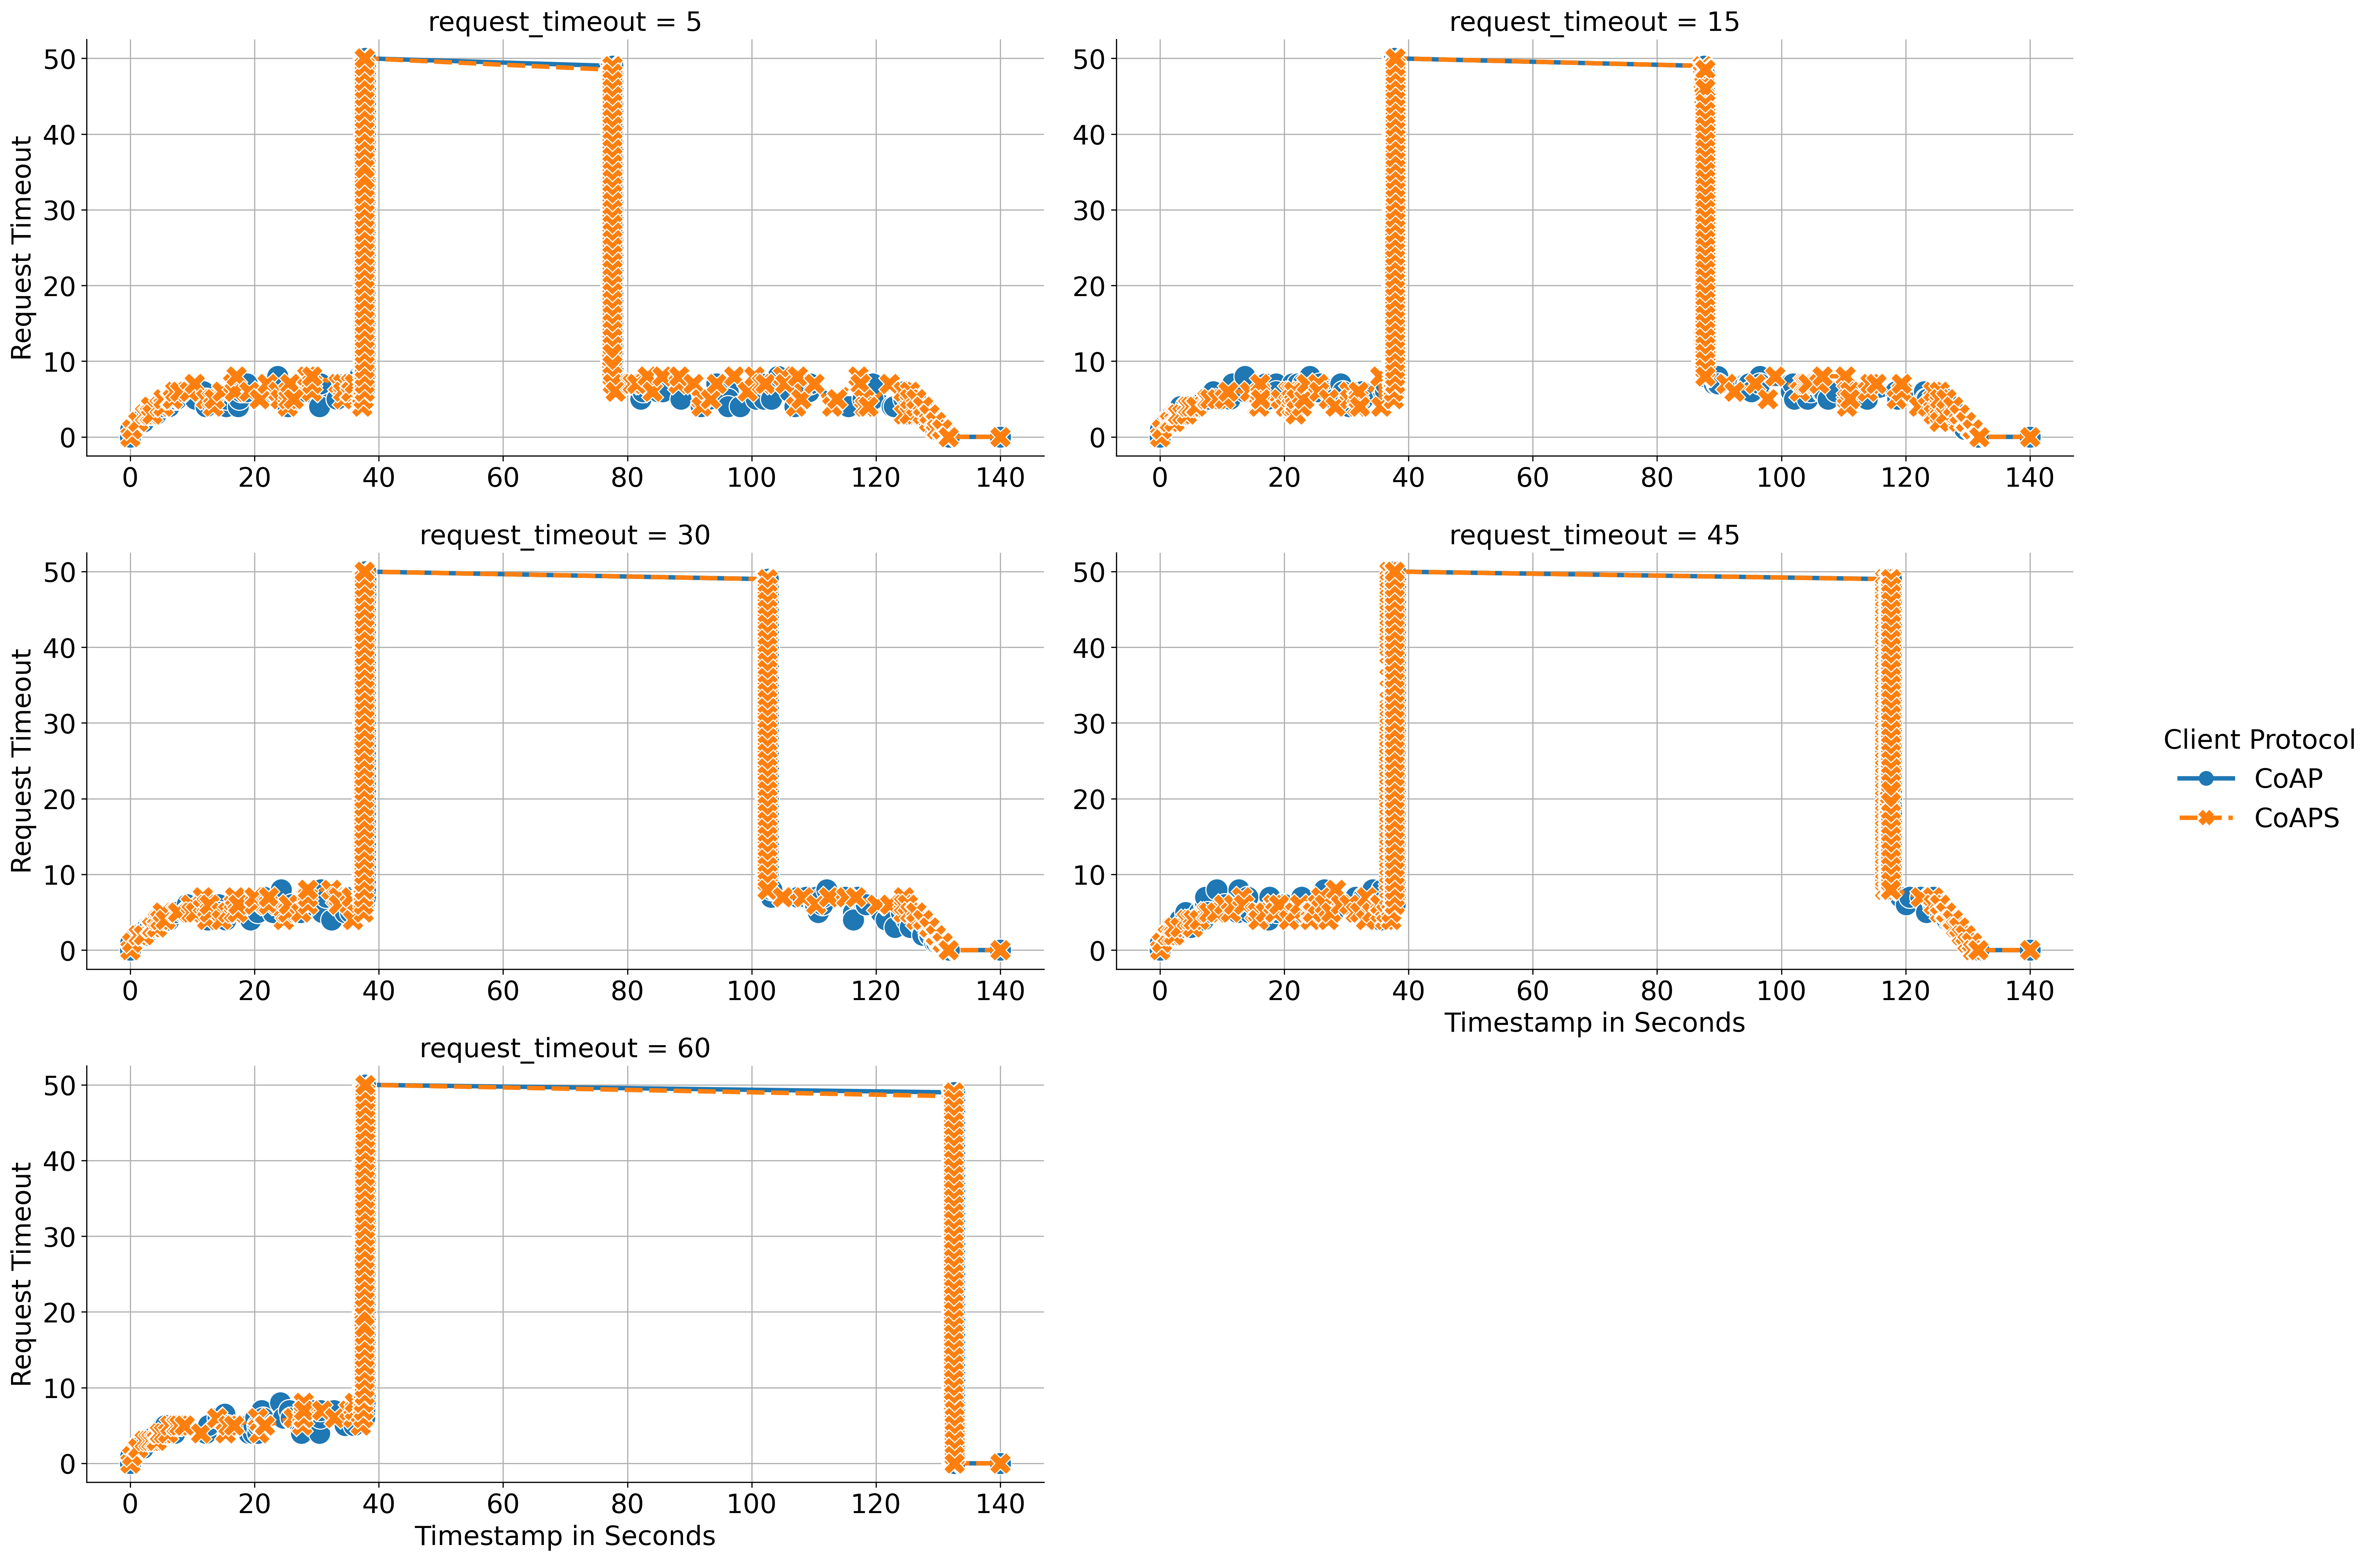

CPU times: user 8.33 s, sys: 542 ms, total: 8.87 s
Wall time: 8.57 s


In [40]:
%%time

## Measure proxy and server connection management.

df = connections_df

g = sns.relplot(
  data=df,
  kind="line",
  x="timestamp",
  y="open_connections",
  hue="run_proxy_with_dtls",
  style="run_proxy_with_dtls",
  col="request_timeout",
  col_wrap=2,
  markers=True,
  markersize=15,
  facet_kws={
    "sharey": False,
    "sharex": False,
  },
  aspect=2,
)
g.set_xlabels("Timestamp in Seconds")
g.set_ylabels("Open Connections")
g.legend.set_title("Client Protocol")

# g.set(yticks=np.arange(1,9,1))
for i in range(5):
  g.axes[i].grid(True, axis="both")

plt.grid(True, axis="y")
plt.show()

In [ ]:
connections_df

,exp_id,trial,observer_id,timestamp,cum_syn,cum_fin,open_connections,attacker_rate,server_connections,max_keep_alive_requests,...,topology_name,num_proxy_connections,request_timeout,max_retries,keep_alive_duration,request_retry_interval,reuse_connections,run_proxy_with_dtls,run_proxy_with_https,run_attacker
0,thesis_group_proxy_occ_timeout_8clients_withattacker_8000MBheap_50proxyconns_15sec_pxyto_coap_https__140sec_proxy__30sec_attacker__120sec_client,1,proxy,0.000000,0,0,0,100mbps,256,0,...,thesis_cloud_proxy_and_internet_attacker,50,15,2,5,1,True,CoAP,True,True
1,thesis_group_proxy_occ_timeout_8clients_withattacker_8000MBheap_50proxyconns_15sec_pxyto_coap_https__140sec_proxy__30sec_attacker__120sec_client,1,proxy,0.065019,1,0,1,100mbps,256,0,...,thesis_cloud_proxy_and_internet_attacker,50,15,2,5,1,True,CoAP,True,True
2,thesis_group_proxy_occ_timeout_8clients_withattacker_8000MBheap_50proxyconns_15sec_pxyto_coap_https__140sec_proxy__30sec_attacker__120sec_client,1,proxy,2.067345,2,0,2,100mbps,256,0,...,thesis_cloud_proxy_and_internet_attacker,50,15,2,5,1,True,CoAP,True,True
3,thesis_group_proxy_occ_timeout_8clients_withattacker_8000MBheap_50proxyconns_15sec_pxyto_coap_https__140sec_proxy__30sec_attacker__120sec_client,1,proxy,3.186998,3,0,3,100mbps,256,0,...,thesis_cloud_proxy_and_internet_attacker,50,15,2,5,1,True,CoAP,True,True
4,thesis_group_proxy_occ_timeout_8clients_withattacker_8000MBheap_50proxyconns_15sec_pxyto_coap_https__140sec_proxy__30sec_attacker__120sec_client,1,proxy,6.052259,4,0,4,100mbps,256,0,...,thesis_cloud_proxy_and_internet_attacker,50,15,2,5,1,True,CoAP,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5415,thesis_group_proxy_occ_timeout_8clients_withattacker_8000MBheap_50proxyconns_60sec_pxyto_dtls_https__140sec_proxy__30sec_attacker__120sec_client,5,proxy,132.344406,52,48,4,100mbps,256,0,...,thesis_cloud_proxy_and_internet_attacker,50,60,2,5,1,True,CoAPS,True,True
5416,thesis_group_proxy_occ_timeout_8clients_withattacker_8000MBheap_50proxyconns_60sec_pxyto_dtls_https__140sec_proxy__30sec_attacker__120sec_client,5,proxy,132.344436,52,49,3,100mbps,256,0,...,thesis_cloud_proxy_and_internet_attacker,50,60,2,5,1,True,CoAPS,True,True
5417,thesis_group_proxy_occ_timeout_8clients_withattacker_8000MBheap_50proxyconns_60sec_pxyto_dtls_https__140sec_proxy__30sec_attacker__120sec_client,5,proxy,132.344472,52,50,2,100mbps,256,0,...,thesis_cloud_proxy_and_internet_attacker,50,60,2,5,1,True,CoAPS,True,True
5418,thesis_group_proxy_occ_timeout_8clients_withattacker_8000MBheap_50proxyconns_60sec_pxyto_dtls_https__140sec_proxy__30sec_attacker__120sec_client,5,proxy,132.344504,52,51,1,100mbps,256,0,...,thesis_cloud_proxy_and_internet_attacker,50,60,2,5,1,True,CoAPS,True,True


In [ ]:
grouped_connections_df = (
  connections_df
  .groupby(by=["exp_id", "trial", "observer_id"])
  .agg(
    mean_open_connections=("open_connections", "mean"),
    run_proxy_with_dtls=("run_proxy_with_dtls", "first"),
    num_clients=("num_clients", "first"),
  )
  .reset_index()
)

g = sns.catplot(
  data=grouped_connections_df,
  kind="bar",
  x="num_clients",
  y="mean_open_connections",
  hue="run_proxy_with_dtls",
  ci="sd",
  aspect=2,
)

grouped_connections_df

,exp_id,trial,observer_id,mean_open_connections,run_proxy_with_dtls,num_clients
0,thesis_group_proxy_occ_timeout_8clients_withattacker_8000MBheap_50proxyconns_15sec_pxyto_coap_https__140sec_proxy__30sec_attacker__120sec_client,1,proxy,22.743363,CoAP,8
1,thesis_group_proxy_occ_timeout_8clients_withattacker_8000MBheap_50proxyconns_15sec_pxyto_coap_https__140sec_proxy__30sec_attacker__120sec_client,2,proxy,22.761062,CoAP,8
2,thesis_group_proxy_occ_timeout_8clients_withattacker_8000MBheap_50proxyconns_15sec_pxyto_coap_https__140sec_proxy__30sec_attacker__120sec_client,3,proxy,24.038095,CoAP,8
3,thesis_group_proxy_occ_timeout_8clients_withattacker_8000MBheap_50proxyconns_15sec_pxyto_coap_https__140sec_proxy__30sec_attacker__120sec_client,4,proxy,23.144144,CoAP,8
4,thesis_group_proxy_occ_timeout_8clients_withattacker_8000MBheap_50proxyconns_15sec_pxyto_coap_https__140sec_proxy__30sec_attacker__120sec_client,5,proxy,23.412844,CoAP,8
5,thesis_group_proxy_occ_timeout_8clients_withattacker_8000MBheap_50proxyconns_15sec_pxyto_dtls_https__140sec_proxy__30sec_attacker__120sec_client,1,proxy,22.654867,CoAPS,8
6,thesis_group_proxy_occ_timeout_8clients_withattacker_8000MBheap_50proxyconns_15sec_pxyto_dtls_https__140sec_proxy__30sec_attacker__120sec_client,2,proxy,23.376147,CoAPS,8
7,thesis_group_proxy_occ_timeout_8clients_withattacker_8000MBheap_50proxyconns_15sec_pxyto_dtls_https__140sec_proxy__30sec_attacker__120sec_client,3,proxy,22.068376,CoAPS,8
8,thesis_group_proxy_occ_timeout_8clients_withattacker_8000MBheap_50proxyconns_15sec_pxyto_dtls_https__140sec_proxy__30sec_attacker__120sec_client,4,proxy,24.359223,CoAPS,8
9,thesis_group_proxy_occ_timeout_8clients_withattacker_8000MBheap_50proxyconns_15sec_pxyto_dtls_https__140sec_proxy__30sec_attacker__120sec_client,5,proxy,23.036036,CoAPS,8
